In [3693]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import norm, stats
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [3440]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head() #Read the csv file

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

# Documentation

In [ ]:
# 1. Some columns are highly correlated with each other like- ER, RA, ERA
# 2. Column R, ERA, SHO, SV, E are outliers
# 3. Column CG is left skewed
# 4. Column CG have zero values
# 5. Column H & AB are also correlated with each other

In [3441]:
df.shape #check the shape of our dataset

(30, 17)

In [3442]:
df.describe() #check the mean, std, iqr and quartile range in our dataset

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [3443]:
df.info() #check the null values and Dtype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [3444]:
df.duplicated().sum() #check if any rows are duplicate or not

0

In [3445]:
# analyize the correlation
corr = df.corr()
corr.shape

(17, 17)

<function matplotlib.pyplot.show(close=None, block=None)>

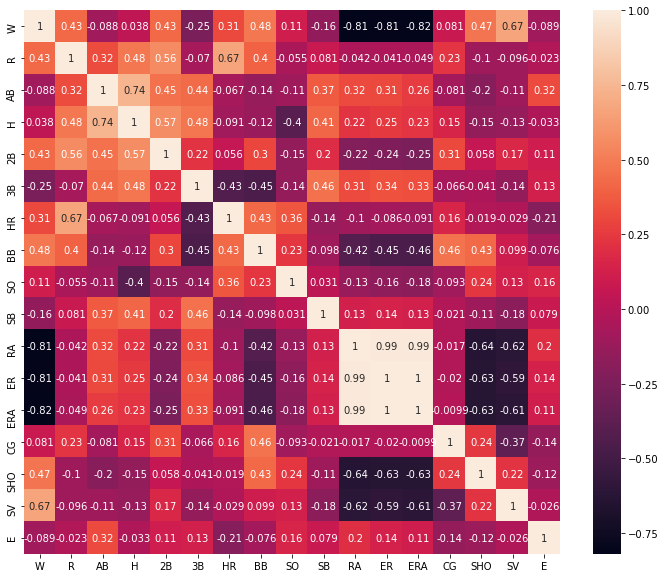

In [3446]:
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

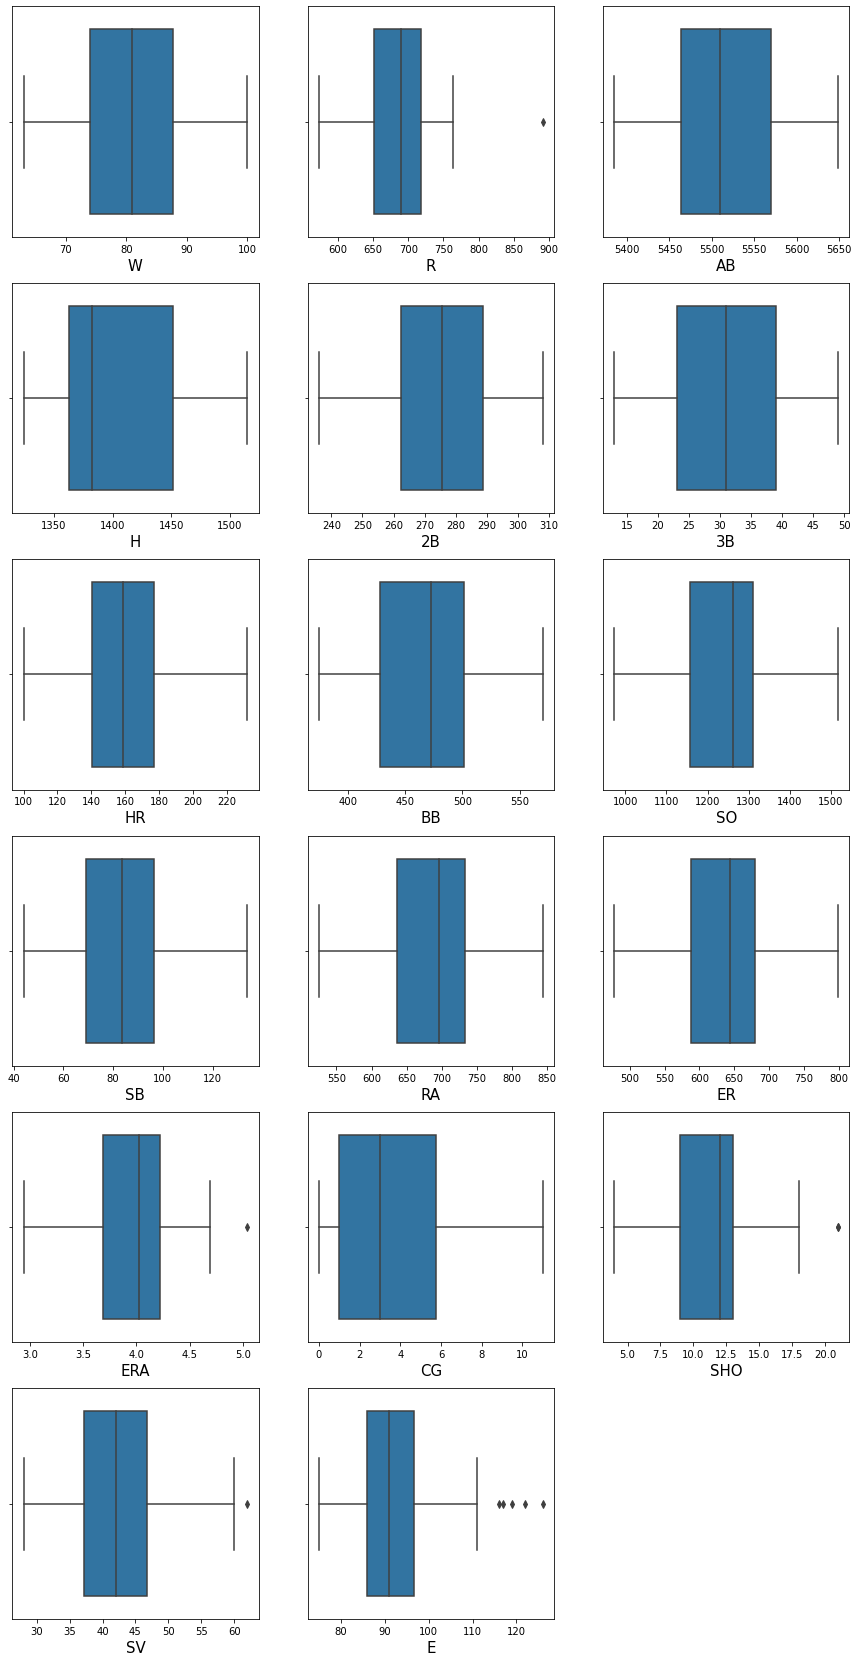

In [3447]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
plt.show() 

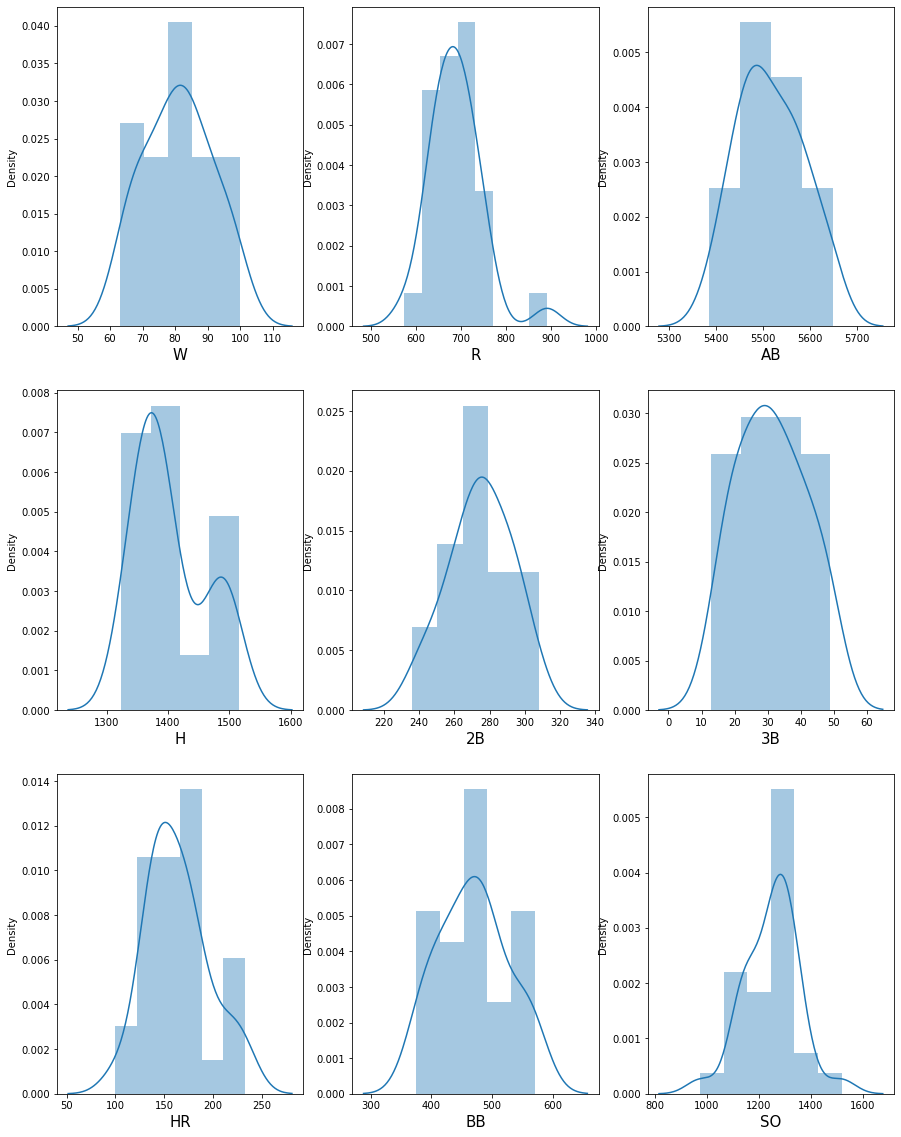

In [3448]:
#visaulize the columns by using distplot
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

# Column2: R - Runs

In [3449]:
df['R'].unique() #check the unique values in our column

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

In [3450]:
df['R'].value_counts()

696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64

In [3451]:
df['R'].all() #check the zero value in our column

True

In [3452]:
df['R'].describe() #check the mean, std, iqr and quartile range of our column

count     30.000000
mean     688.233333
std       58.761754
min      573.000000
25%      651.250000
50%      689.000000
75%      718.250000
max      891.000000
Name: R, dtype: float64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

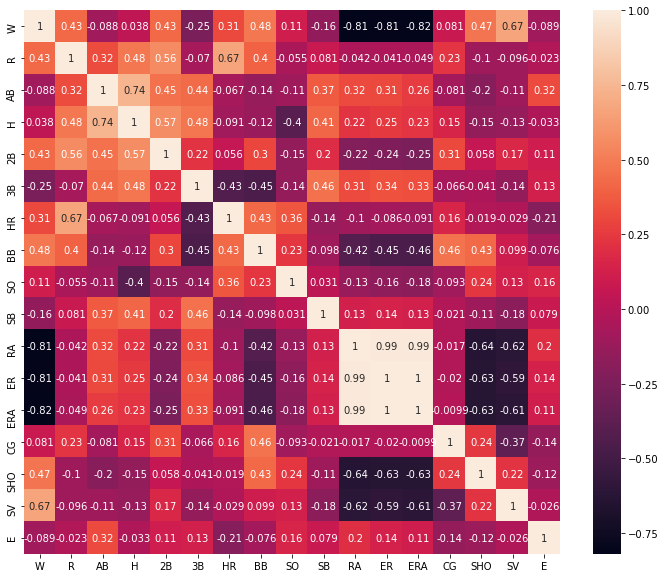

In [3453]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 

In [3454]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['R'].mean())
print('Median of the column:----->',df['R'].median())
print('Mode of the column:----->',st.mode(df['R']))
print('std of the column:----->',df['R'].std())
#mean,median,mode values are not good right now because of some outliers

Mean of the column:-----> 688.2333333333333
Median of the column:-----> 689.0
Mode of the column:-----> 696
std of the column:-----> 58.76175353204599


<AxesSubplot:xlabel='R', ylabel='W'>

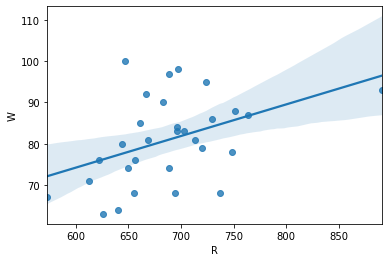

In [3455]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = 'R', y='W')

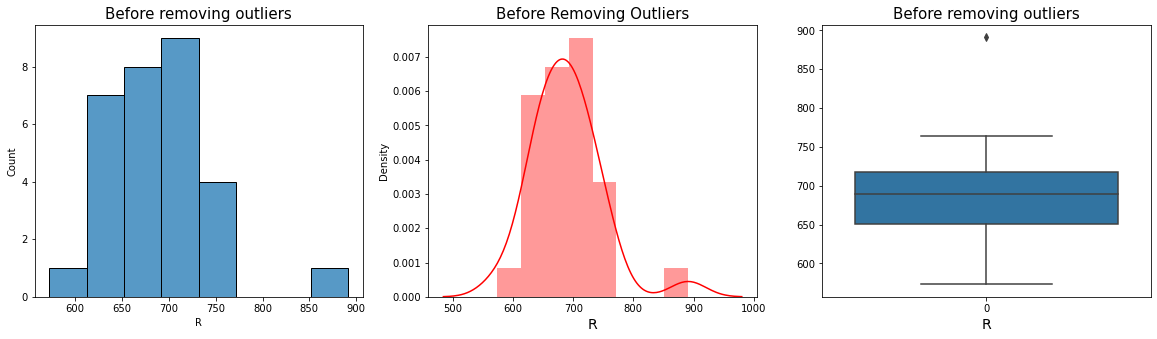

In [3456]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['R']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.subplot(1,3,2)
sns.distplot(df['R'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('R', fontsize= 14)
plt.subplot(1,3,3)
sns.boxplot(data = df['R']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('R', fontsize= 14)
plt.show()

In [3457]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['R'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['R'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['R'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['R'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 55.5

 **************************************************
Higher range:-
 (array([5], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [3458]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (30, 17)
New Shape:------>  (29, 17)


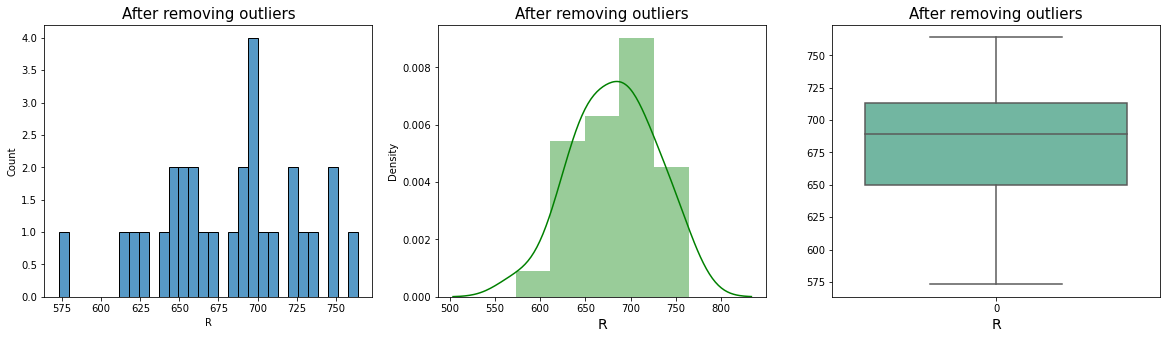

In [3459]:
#Visualization after removing the outliers
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['R'], bins = 30) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)

plt.subplot(1,3,2)
sns.distplot(df['R'], color ='g') #visualize the normalization curve by using distplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('R', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['R'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('R', fontsize= 14)

plt.show()

In [3460]:
df['R'].describe() #check the mean, std, iqr and quartile range of our column

count     29.000000
mean     681.241379
std       45.357040
min      573.000000
25%      650.000000
50%      689.000000
75%      713.000000
max      764.000000
Name: R, dtype: float64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

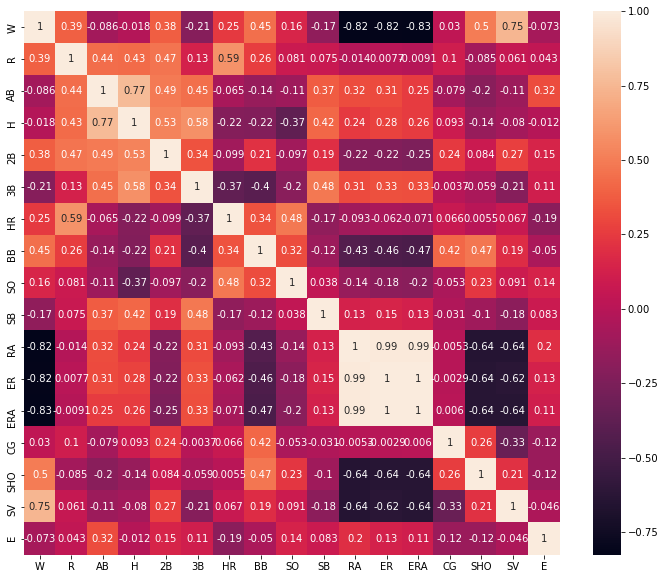

In [3461]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)

# Now, Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show  #Earlier the correlation between this column to label is 0.43 but now, it reduces to 0.39

In [3462]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['R'].mean())
print('Median of the column:----->',df['R'].median())
print('Mode of the column:----->',st.mode(df['R']))
print('std of the column:----->',df['R'].std())
#Now, We can see that our mean,median,mode values are still not good

Mean of the column:-----> 681.2413793103449
Median of the column:-----> 689.0
Mode of the column:-----> 696
std of the column:-----> 45.357040068150866


In [3463]:
#replacing mode by column mean to get more normal curve
df['R']= df['R'].replace(696,df['R'].mean())

In [3464]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['R'].mean())
print('Median of the column:----->',df['R'].median())
print('Mode of the column:----->',st.mode(df['R']))
print('std of the column:----->',df['R'].std())
#Now, We can see that our mean,median,mode values are good now 

Mean of the column:-----> 680.2235434007134
Median of the column:-----> 681.2413793103449
Mode of the column:-----> 681.2413793103449
std of the column:-----> 45.17333002181558


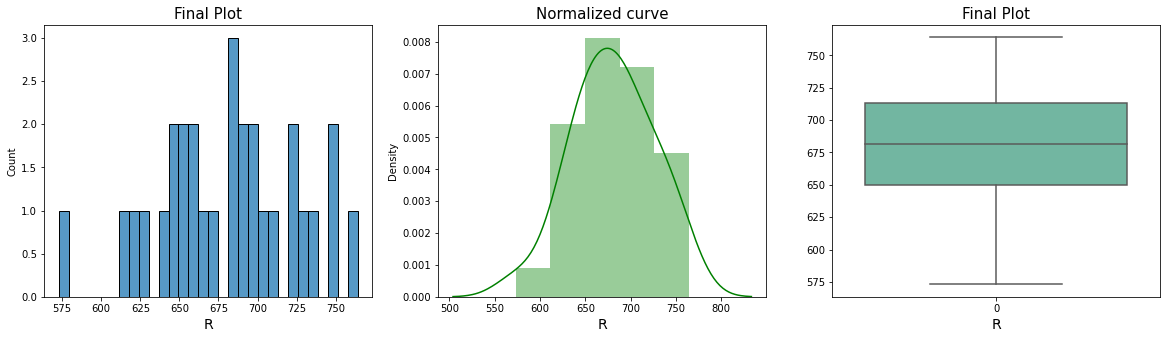

In [3465]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['R'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('R', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['R'], color ='g') #visualize the normalization curve by using distplot
plt.title('Normalized curve', fontsize=15)
plt.xlabel('R', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['R'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('R', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

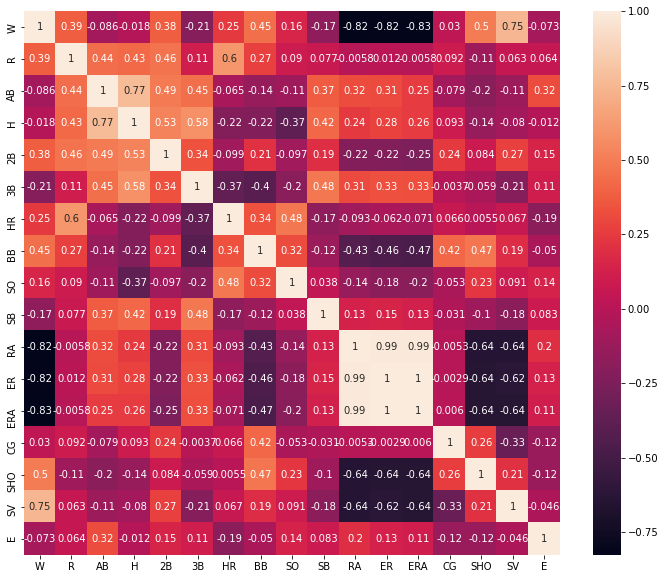

In [3466]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)

# Now, Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show  #Nothing effect on correlation between this column and label

In [3467]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (29, 17)


# Column3: AB - At Bats

In [3468]:
df['AB'].unique() #check the unique values in our coloumn

array([5575, 5467, 5439, 5533, 5605, 5567, 5485, 5640, 5511, 5459, 5417,
       5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463, 5420,
       5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [3469]:
df['AB'].value_counts() #check the number of counts assign to every particular data in this column

5485    2
5571    1
5572    1
5491    1
5565    1
5457    1
5428    1
5420    1
5567    1
5480    1
5439    1
5484    1
5417    1
5544    1
5605    1
5527    1
5600    1
5533    1
5467    1
5529    1
5463    1
5459    1
5649    1
5511    1
5385    1
5640    1
5575    1
5631    1
Name: AB, dtype: int64

In [3470]:
df['AB'].describe() #check the mean, std, iqr and quartile 

count      29.000000
mean     5516.517241
std        71.701076
min      5385.000000
25%      5463.000000
50%      5511.000000
75%      5571.000000
max      5649.000000
Name: AB, dtype: float64

In [3471]:
df['AB'].all() #check the zero value in our column

True

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

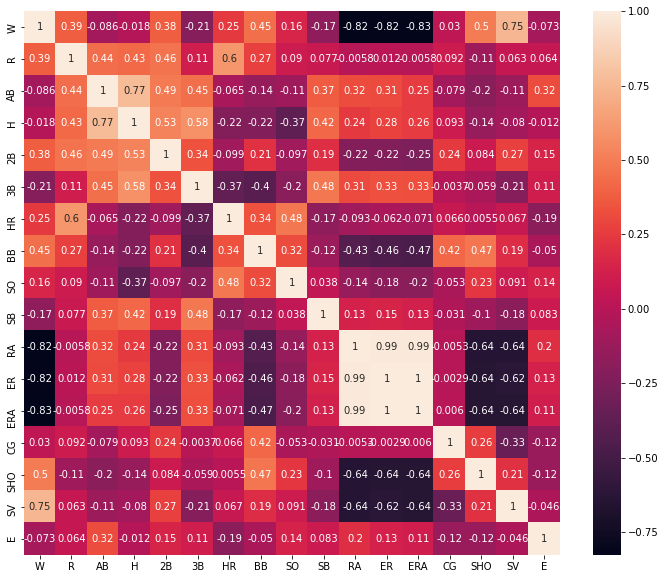

In [3472]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'AB' and Label:- 'W' is -0.086

<AxesSubplot:xlabel='AB', ylabel='W'>

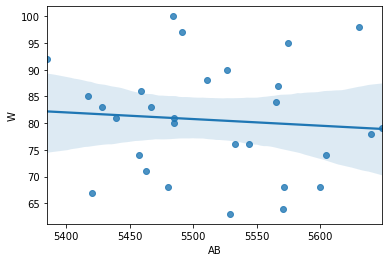

In [3473]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = 'AB', y='W')

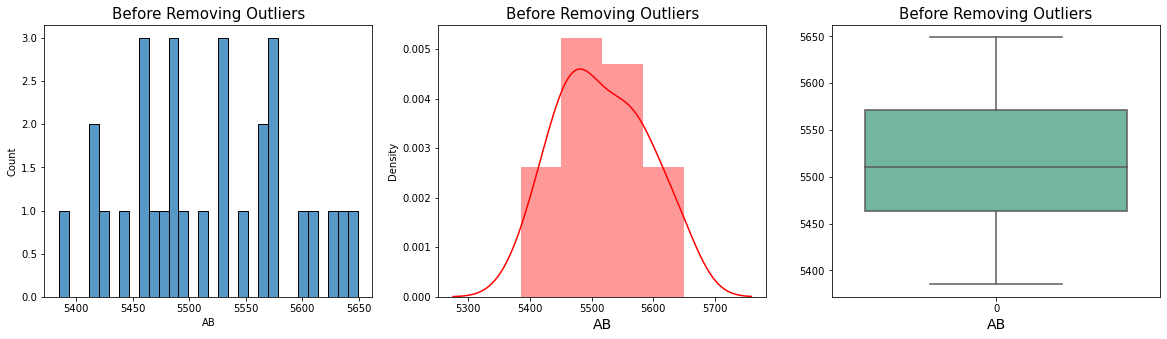

In [3474]:
#Visualization
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(df['AB'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)

plt.subplot(1,3,2)
sns.distplot(df['AB'], color ='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('AB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['AB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('AB', fontsize= 14)

plt.show()

In [3475]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['AB'].mean())
print('Median of the column:----->',df['AB'].median())
print('Mode of the column:----->',st.mode(df['AB']))
print('std of the column:----->',df['AB'].std())
#We can see that our mean,median,mode values are not looking good 

Mean of the column:-----> 5516.517241379311
Median of the column:-----> 5511.0
Mode of the column:-----> 5485
std of the column:-----> 71.7010762469809


In [3476]:
#replace mode value by column mean to get more noramlized curve
df['AB'] = df['AB'].replace(5485,df['AB'].mean())

In [3477]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['AB'].mean())
print('Median of the column:----->',df['AB'].median())
print('Mode of the column:----->',st.mode(df['AB']))
print('std of the column:----->',df['AB'].std())
#Now, We can see that our mean,median,mode values are looking good 

Mean of the column:-----> 5518.690844233055
Median of the column:-----> 5516.517241379311
Mode of the column:-----> 5516.517241379311
std of the column:-----> 71.17020756091354


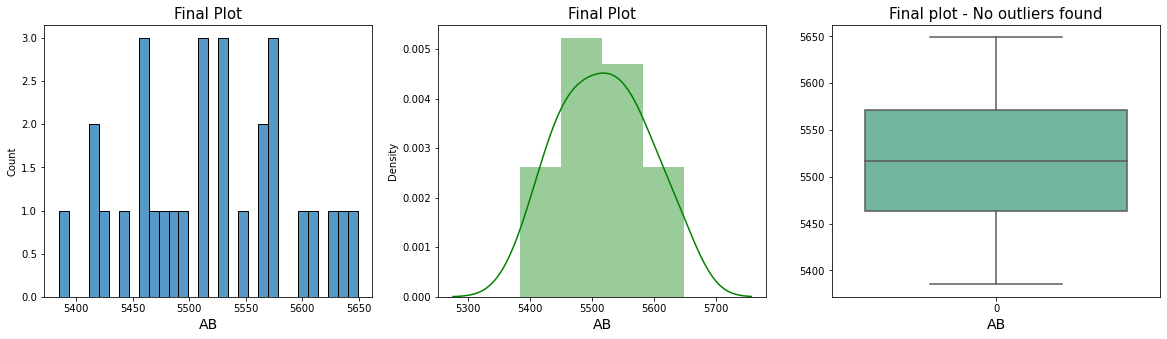

In [3478]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['AB'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('AB', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['AB'], color='g') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('AB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['AB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final plot - No outliers found', fontsize=15)
plt.xlabel('AB', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

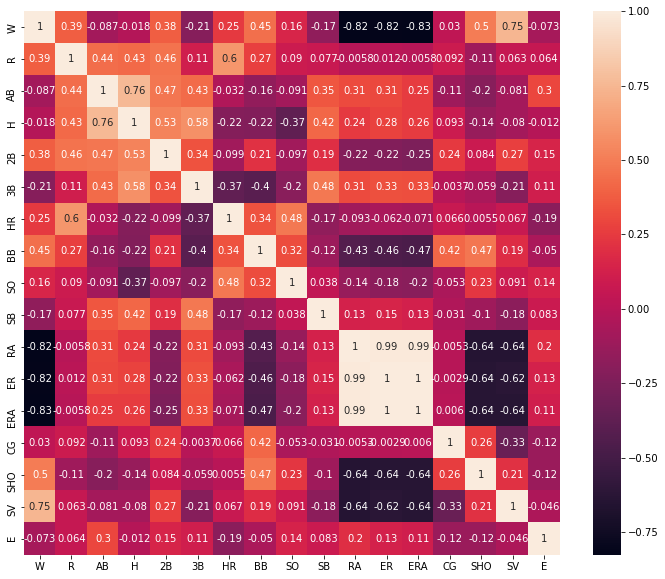

In [3479]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#Earlier, The correlation between Feature:- 'AB' and Label:- 'W' is -0.086 but now it is -0.087

<AxesSubplot:xlabel='AB', ylabel='W'>

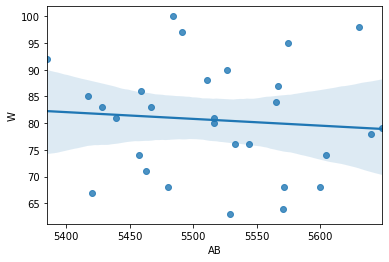

In [3480]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = 'AB', y='W')

In [3481]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (29, 17)


# Columns4: Hits: H

In [3482]:
df['H'].unique() #count the unique value
#there is no null value and no zero value in our column

array([1497, 1349, 1395, 1381, 1515, 1397, 1370, 1383, 1495, 1419, 1363,
       1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420, 1361,
       1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [3483]:
df['H'].describe() #check the mean, std, iqr and quartile range value

count      29.000000
mean     1400.896552
std        56.264265
min      1324.000000
25%      1363.000000
50%      1382.000000
75%      1420.000000
max      1515.000000
Name: H, dtype: float64

In [3484]:
df['H'].value_counts() #check the number of counts assign to every particular data in this column

1363    2
1346    1
1378    1
1462    1
1397    1
1395    1
1479    1
1324    1
1515    1
1386    1
1383    1
1382    1
1381    1
1379    1
1374    1
1349    1
1370    1
1497    1
1331    1
1495    1
1494    1
1405    1
1361    1
1486    1
1420    1
1419    1
1351    1
1341    1
Name: H, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

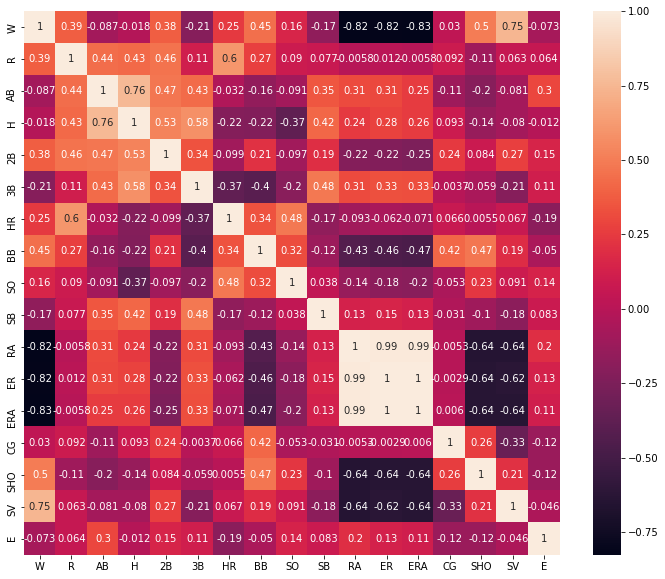

In [3485]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'H - Hits' and Label:- 'W' is -0.018

<AxesSubplot:xlabel='H', ylabel='W'>

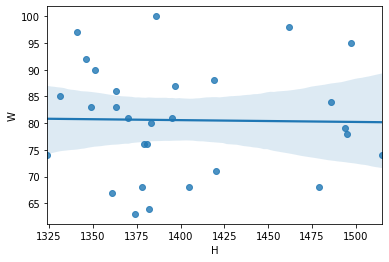

In [3486]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = 'H', y='W')

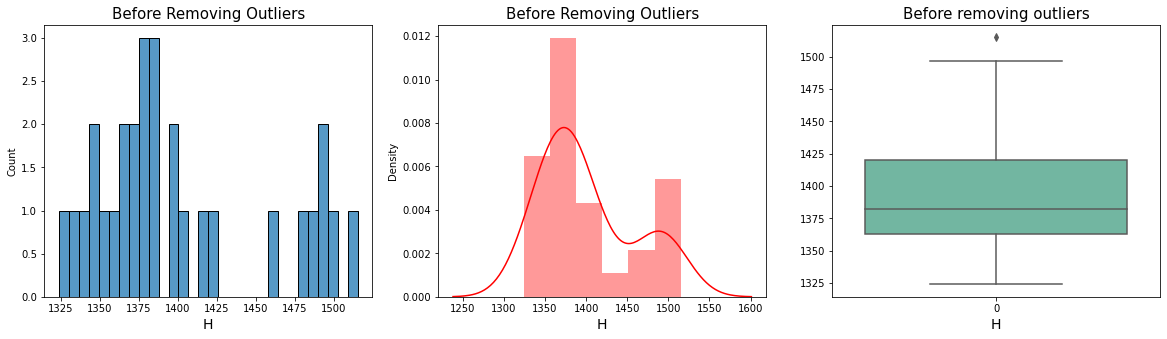

In [3487]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['H'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['H'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['H'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.show()

In [3488]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['H'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['H'], 72,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['H'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['H'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 56.5

 **************************************************
Higher range:-
 (array([4], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [3489]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (29, 17)
New Shape:------>  (28, 17)


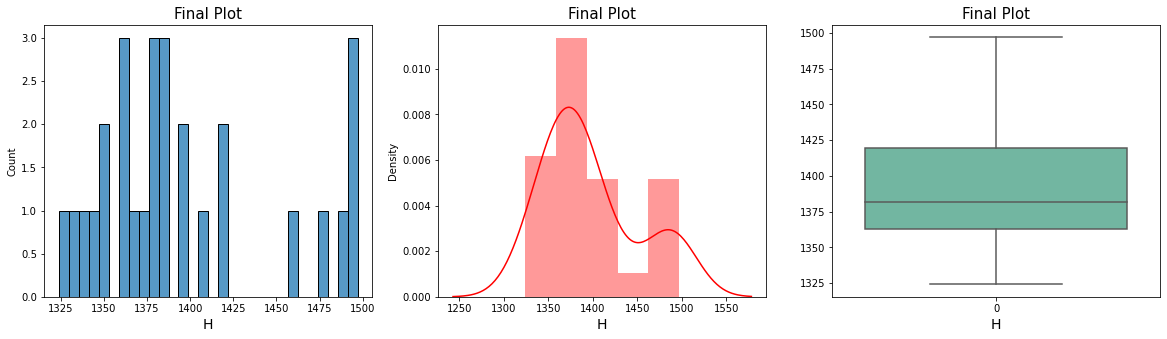

In [3490]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['H'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['H'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['H'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('H', fontsize= 14)

plt.show()

In [3491]:
df['H'].value_counts()#check the number of counts assign to every particular data in this column

1363    2
1346    1
1374    1
1462    1
1397    1
1395    1
1479    1
1324    1
1386    1
1383    1
1382    1
1381    1
1379    1
1378    1
1370    1
1349    1
1497    1
1331    1
1495    1
1494    1
1405    1
1361    1
1486    1
1420    1
1419    1
1351    1
1341    1
Name: H, dtype: int64

In [3492]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['H'].mean())
print('Median of the column:----->',df['H'].median())
print('Mode of the column:----->',st.mode(df['H']))
print('std of the column:----->',df['H'].std())
#Now, We can see that our mean,median,mode values are not good now.
#but, due to our dataset is very less so, we have to comprise with that,

Mean of the column:-----> 1396.8214285714287
Median of the column:-----> 1381.5
Mode of the column:-----> 1363
std of the column:-----> 52.75874761340957


correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

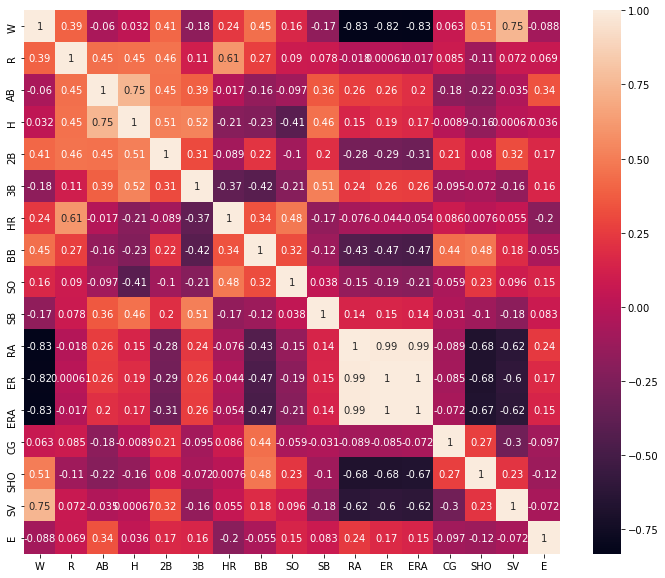

In [3493]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'H - Hits' and Label:- 'W' is -0.032

In [3494]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28, 17)


# Column5: 2B - Doubles

In [3495]:
df['2B'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([300, 277, 303, 260, 272, 246, 278, 294, 279, 243, 262, 288, 292,
       274, 257, 295, 265, 236, 251, 263, 289], dtype=int64)

In [3496]:
df['2B'].describe() #checking the mean, std, iqr and outliers

count     28.000000
mean     273.035714
std       17.325815
min      236.000000
25%      261.500000
50%      274.000000
75%      288.000000
max      303.000000
Name: 2B, dtype: float64

In [3497]:
df['2B'].value_counts() #check the number of counts assign to every particular data in this column

272    3
288    2
277    2
274    2
278    2
260    2
295    1
263    1
265    1
289    1
300    1
257    1
251    1
303    1
294    1
292    1
243    1
262    1
246    1
279    1
236    1
Name: 2B, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

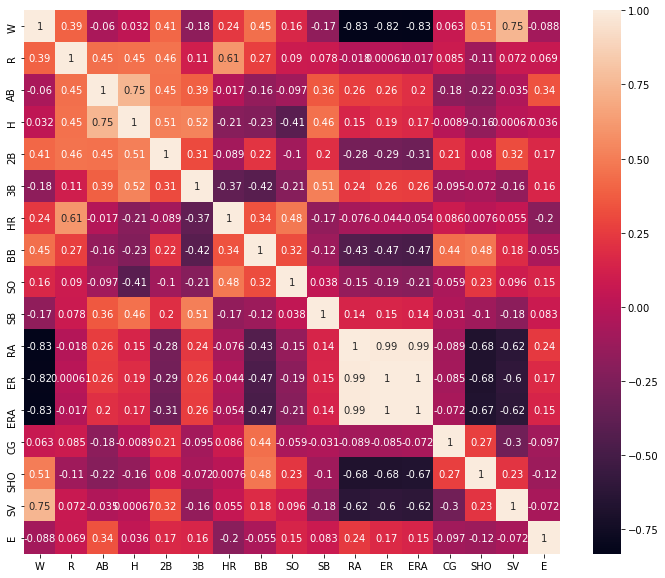

In [3498]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- '2B - Doubles' and Label:- 'W - Wins' is 0.41

<AxesSubplot:xlabel='2B', ylabel='W'>

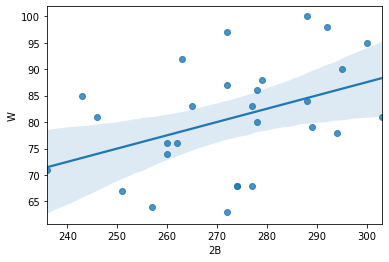

In [3499]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = '2B', y='W')

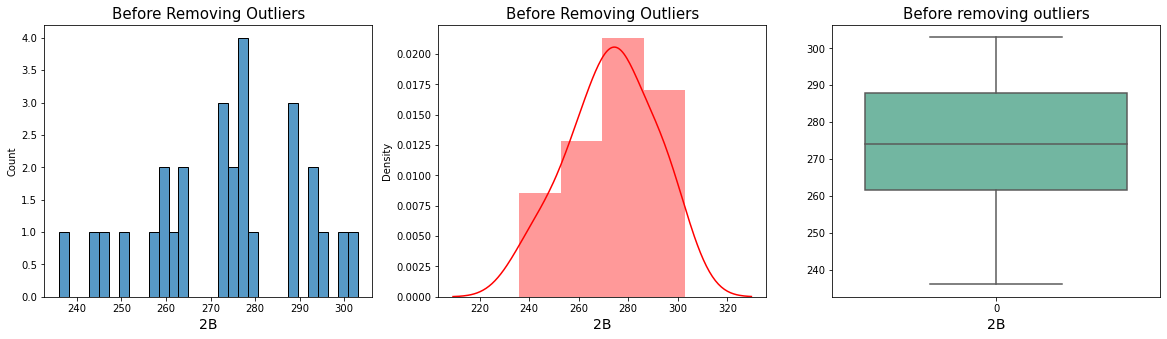

In [3500]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2B'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2B'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['2B'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.show()

In [3501]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['2B'].mean())
print('Median of the column:----->',df['2B'].median())
print('Mode of the column:----->',st.mode(df['2B']))
print('std of the column:----->',df['2B'].std())
#Now, We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 273.0357142857143
Median of the column:-----> 274.0
Mode of the column:-----> 272
std of the column:-----> 17.325814913990698


In [3502]:
#Replace the value of mode to column mean to get more normal curve
df['2B'] = df['2B'].replace(272, df['2B'].mean()) 

In [3503]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['2B'].mean())
print('Median of the column:----->',df['2B'].median())
print('Mode of the column:----->',st.mode(df['2B']))
print('std of the column:----->',df['2B'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 273.1466836734694
Median of the column:-----> 274.0
Mode of the column:-----> 273.0357142857143
std of the column:-----> 17.32200631580455


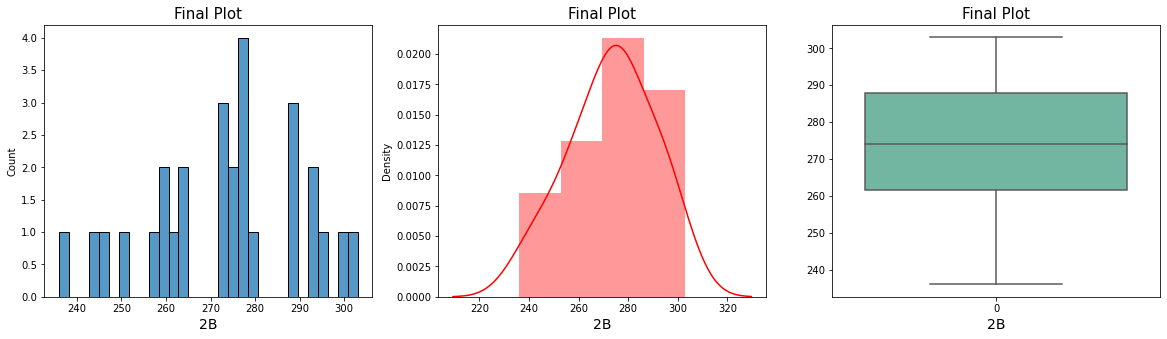

In [3504]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2B'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2B'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['2B'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('2B', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

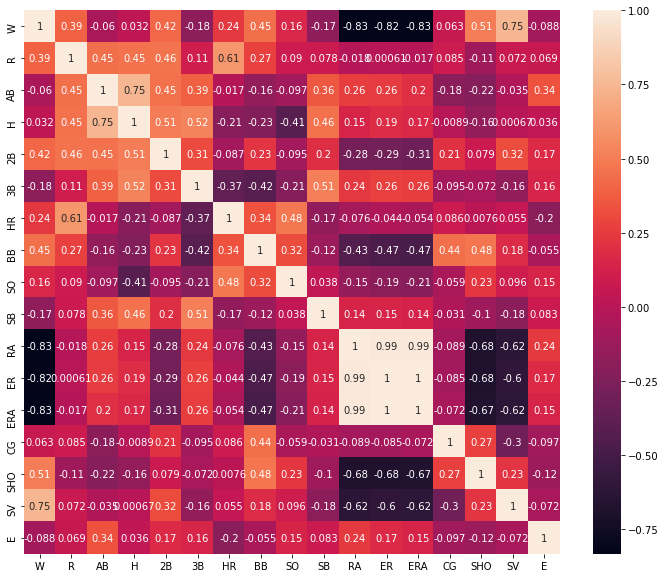

In [3505]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- '2B - Doubles' and Label:- 'W' is 0.42

In [3506]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28, 17)


# Columns6: 3B - Triples

In [3507]:
df['3B'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([42, 44, 29, 27, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34, 17, 13,
       40, 18, 37, 48, 36, 49], dtype=int64)

In [3508]:
df['3B'].value_counts() #check the number of counts assign to every particular data in this column

27    3
32    2
26    2
39    2
48    1
29    1
22    1
21    1
20    1
19    1
18    1
17    1
49    1
33    1
46    1
13    1
44    1
42    1
40    1
37    1
36    1
34    1
30    1
Name: 3B, dtype: int64

In [3509]:
df['3B'].describe() #check the mean, iqr, std and quartile range

count    28.000000
mean     31.178571
std       9.907175
min      13.000000
25%      25.000000
50%      31.000000
75%      39.000000
max      49.000000
Name: 3B, dtype: float64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

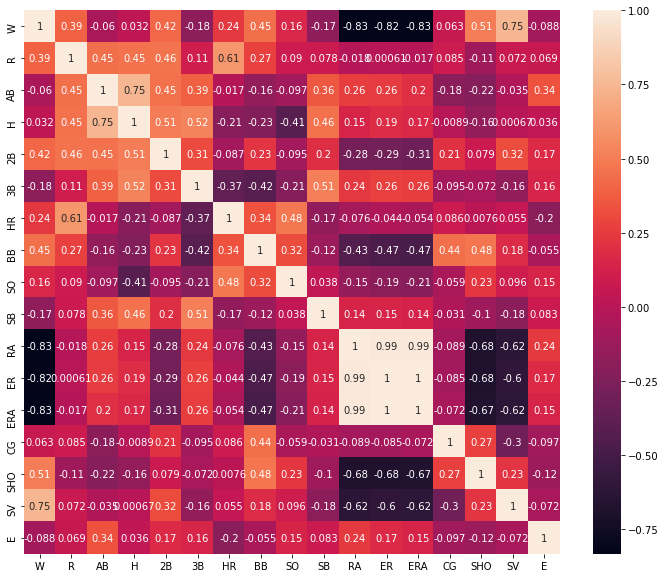

In [3510]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- '3B' and Label:- 'W' is 0.42

<AxesSubplot:xlabel='3B', ylabel='W'>

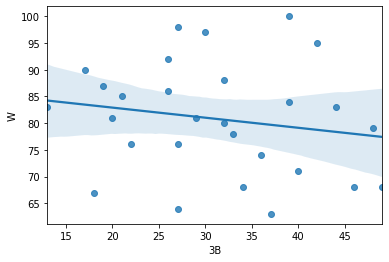

In [3511]:
# Visualize the outliers by using relational plot 
sns.regplot(data= df, x = '3B', y='W')

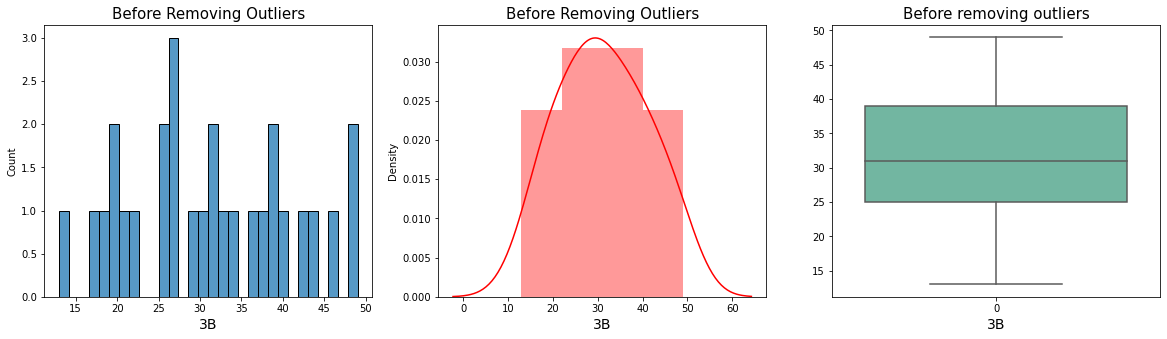

In [3512]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['3B'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['3B'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['3B'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.show()

In [3513]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['3B'].mean())
print('Median of the column:----->',df['3B'].median())
print('Mode of the column:----->',st.mode(df['3B']))
print('std of the column:----->',df['3B'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 31.178571428571427
Median of the column:-----> 31.0
Mode of the column:-----> 27
std of the column:-----> 9.90717499603779


In [3514]:
#Replace the value of mode to column mean to get more normal curve
df['3B']=df['3B'].replace(27,df['3B'].mean())

In [3515]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['3B'].mean())
print('Median of the column:----->',df['3B'].median())
print('Mode of the column:----->',st.mode(df['3B']))
print('std of the column:----->',df['3B'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 31.626275510204085
Median of the column:-----> 31.589285714285715
Mode of the column:-----> 31.178571428571427
std of the column:-----> 9.798173440615287


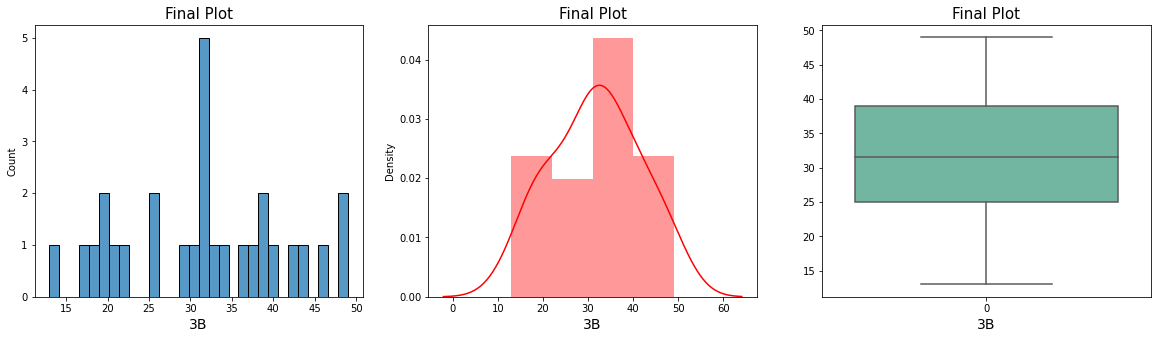

In [3516]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['3B'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['3B'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['3B'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('3B', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

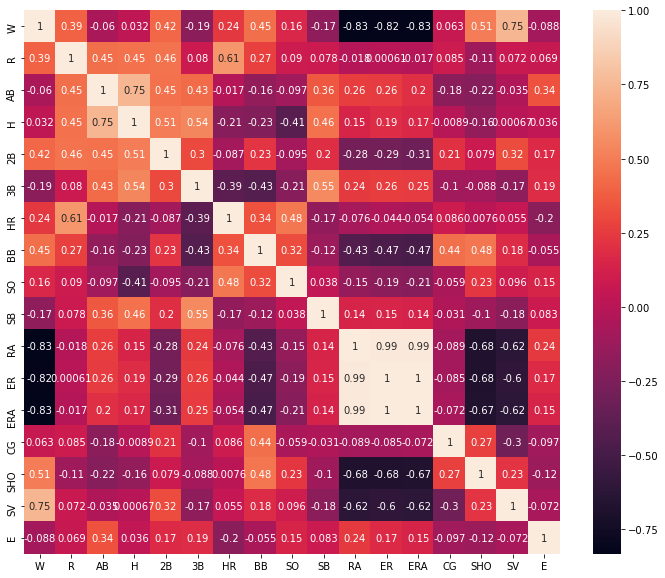

In [3517]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- '3B - Triples' and Label:- 'W - Wins' is -0.19

In [3518]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (28, 17)


# Columns7: HR - Homeruns

In [3519]:
df['HR'].unique()#check the unique values in our column
#We clearly see there is no null values and zeros in our column

array([139, 156, 141, 136, 212, 217, 167, 161, 172, 230, 176, 198, 146,
       137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148, 186],
      dtype=int64)

In [3520]:
df['HR'].describe() #check the mean, std, iqr and quartile in our column

count     28.000000
mean     161.642857
std       30.076710
min      100.000000
25%      139.750000
50%      158.500000
75%      177.000000
max      230.000000
Name: HR, dtype: float64

In [3521]:
df['HR'].value_counts() #check the number of counts assign to every particular data in this column

167    2
136    2
177    2
161    1
146    1
186    1
156    1
187    1
154    1
217    1
120    1
171    1
212    1
176    1
145    1
130    1
148    1
141    1
172    1
139    1
198    1
230    1
100    1
137    1
140    1
Name: HR, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

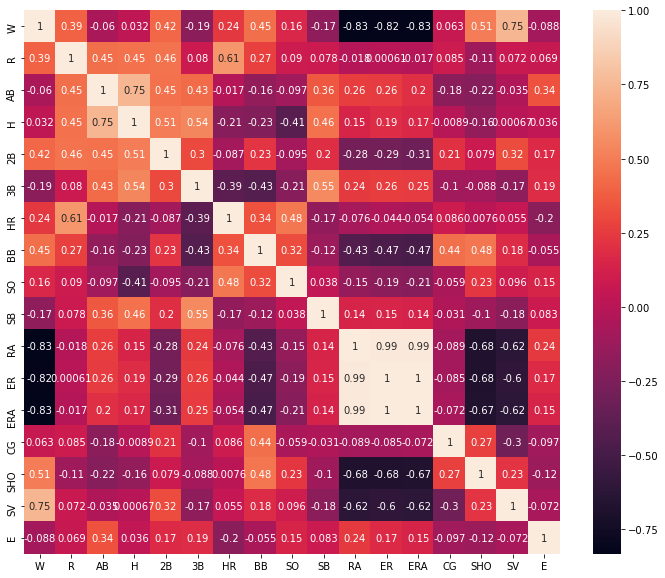

In [3522]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'HR - Homeruns' and Label:- 'W - Wins' is 0.24

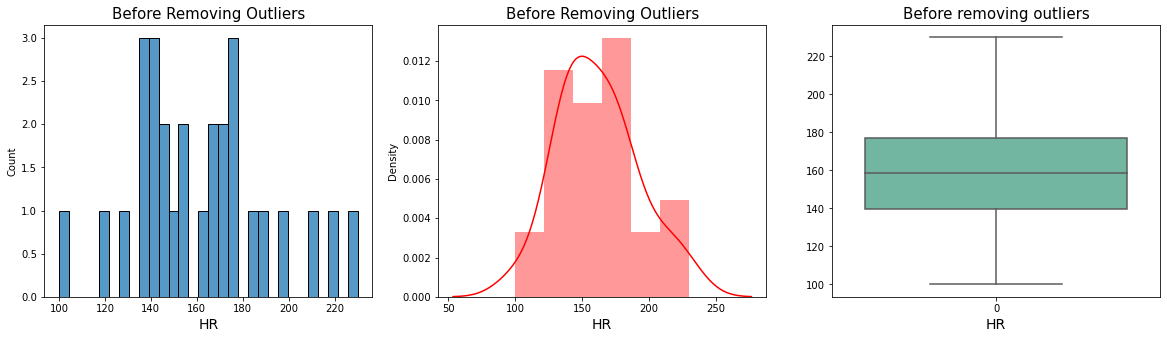

In [3523]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['HR'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['HR'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['HR'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.show()

In [3524]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['HR'].mean())
print('Median of the column:----->',df['HR'].median())
print('Mode of the column:----->',st.mode(df['HR']))
print('std of the column:----->',df['HR'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 161.64285714285714
Median of the column:-----> 158.5
Mode of the column:-----> 136
std of the column:-----> 30.076709687205906


In [3525]:
#Replace the value of mode to column mean to get more normal curve
df['HR'] = df['HR'].replace(136, df['HR'].mean())

In [3526]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['HR'].mean())
print('Median of the column:----->',df['HR'].median())
print('Mode of the column:----->',st.mode(df['HR']))
print('std of the column:----->',df['HR'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 163.47448979591834
Median of the column:-----> 161.64285714285714
Mode of the column:-----> 161.64285714285714
std of the column:-----> 29.196257838348195


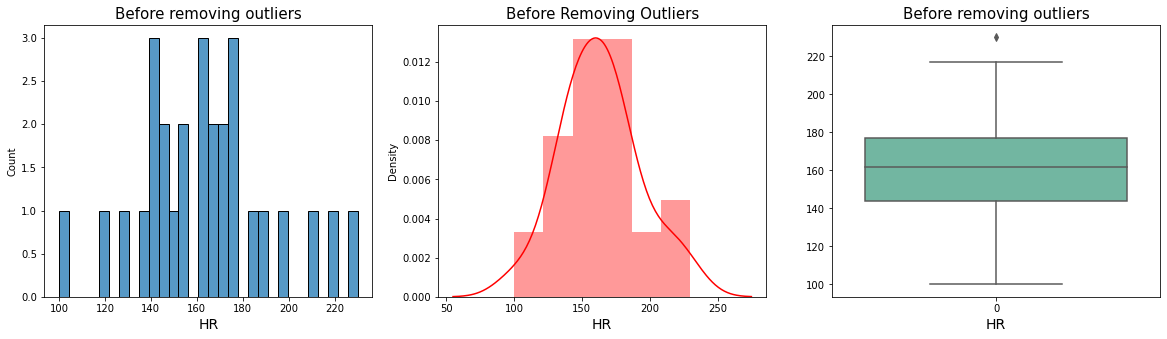

In [3527]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['HR'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['HR'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['HR'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.show()

In [3528]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['HR'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['HR'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['HR'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['HR'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 34.0

 **************************************************
Higher range:-
 (array([9], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [3529]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (28, 17)
New Shape:------>  (27, 17)


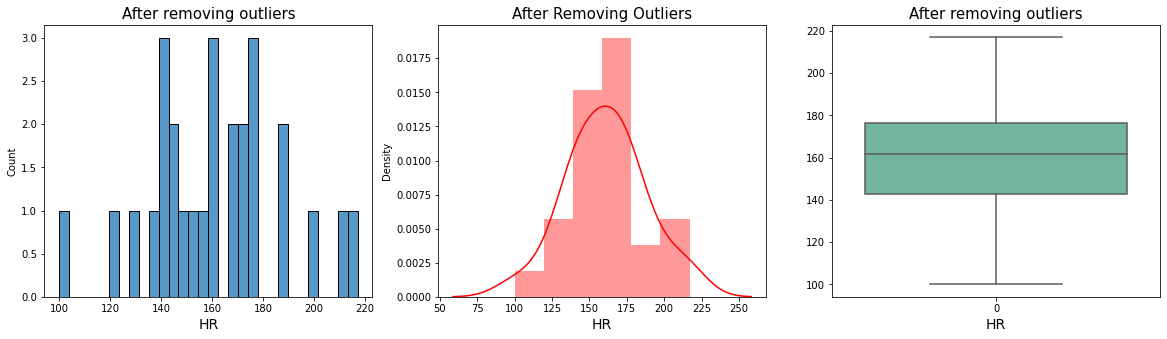

In [3530]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['HR'], bins = 30) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['HR'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['HR'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('HR', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

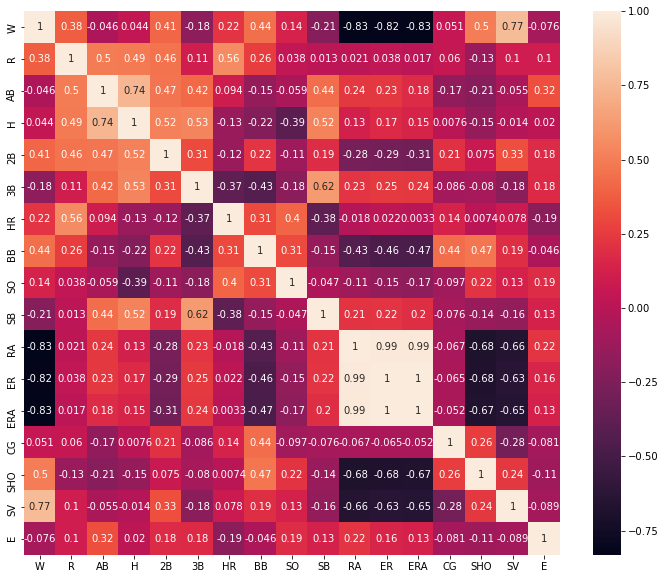

In [3531]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'HR' and Label:- 'W' is 0.22

In [3532]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['HR'].mean())
print('Median of the column:----->',df['HR'].median())
print('Mode of the column:----->',st.mode(df['HR']))
print('std of the column:----->',df['HR'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 161.010582010582
Median of the column:-----> 161.64285714285714
Mode of the column:-----> 161.64285714285714
std of the column:-----> 26.621147975001904


In [3533]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 17)


# Columns8: BB - Walks

In [3534]:
df['BB'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([383, 439, 533, 404, 554, 418, 436, 478, 503, 435, 475, 506, 461,
       567, 412, 496, 488, 539, 375, 471, 387, 563, 457, 490, 426, 388],
      dtype=int64)

In [3535]:
df['BB'].describe() #check the mean, std, iqr and quartile values

count     27.000000
mean     465.259259
std       56.614481
min      375.000000
25%      422.000000
50%      471.000000
75%      499.500000
max      567.000000
Name: BB, dtype: float64

In [3536]:
df['BB'].value_counts() #check the number of counts assign to every particular data in this column

478    2
387    1
435    1
506    1
503    1
436    1
563    1
496    1
490    1
439    1
475    1
554    1
488    1
533    1
388    1
418    1
412    1
539    1
375    1
471    1
426    1
404    1
567    1
461    1
457    1
383    1
Name: BB, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

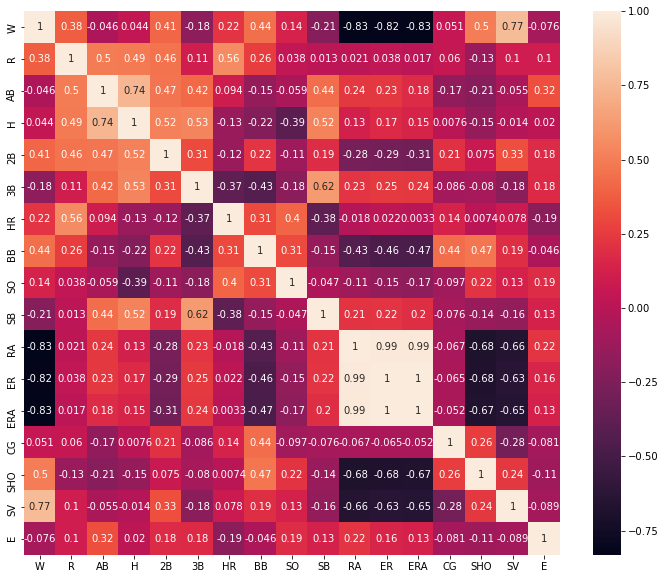

In [3537]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'BB' and Label:- 'W' is 0.42

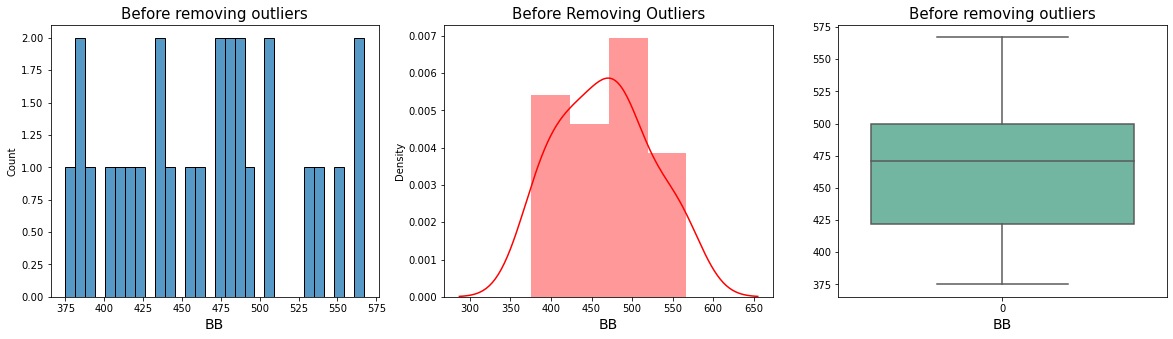

In [3538]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BB'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BB'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['BB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.show()

In [3539]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['BB'].mean())
print('Median of the column:----->',df['BB'].median())
print('Mode of the column:----->',st.mode(df['BB']))
print('std of the column:----->',df['BB'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 465.25925925925924
Median of the column:-----> 471.0
Mode of the column:-----> 478
std of the column:-----> 56.61448074653189


In [3540]:
#Replace the value of mode to column mean to get more normal curve
df['BB']= df['BB'].replace(478,df['BB'].mean())

In [3541]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['BB'].mean())
print('Median of the column:----->',df['BB'].median())
print('Mode of the column:----->',st.mode(df['BB']))
print('std of the column:----->',df['BB'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 464.31550068587103
Median of the column:-----> 465.25925925925924
Mode of the column:-----> 465.25925925925924
std of the column:-----> 56.4959099504383


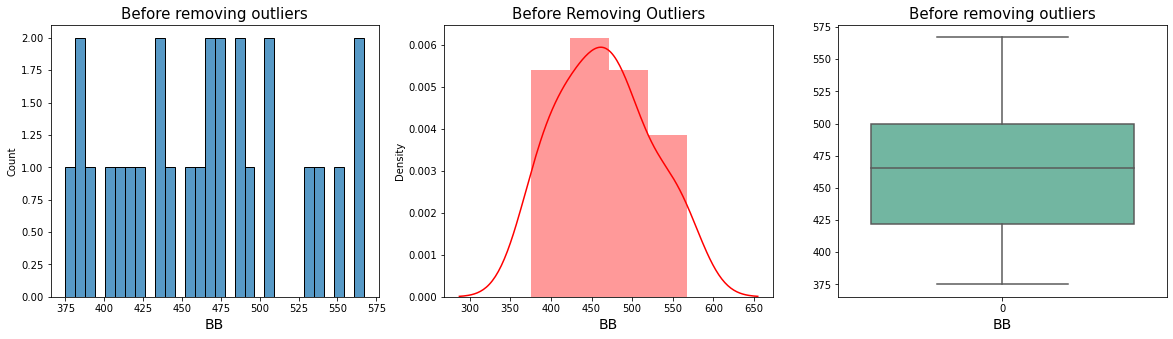

In [3542]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BB'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BB'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['BB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('BB', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

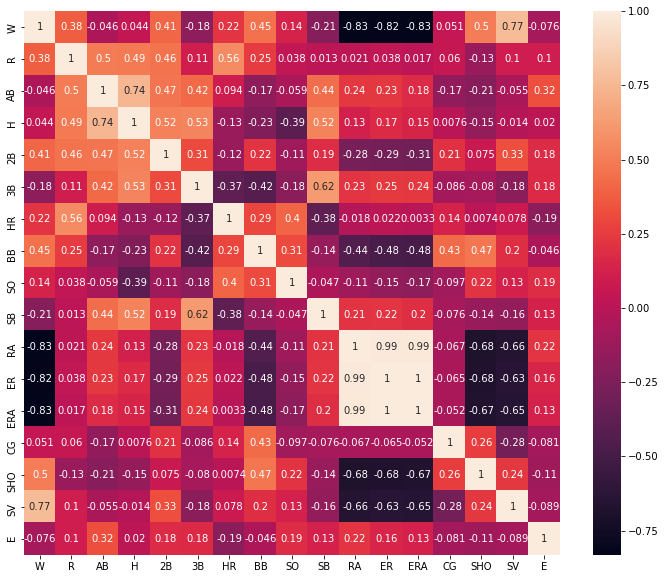

In [3543]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'BB' and Label:- 'W' is 0.42

In [3544]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 17)


# Columns9: SO - Strikeouts

In [3545]:
df['SO'].unique() #check the unique value in our column
#and we clearly see, there is no null value and no zeros in our column

array([ 973, 1264, 1157, 1231, 1227, 1331, 1310, 1148, 1233, 1150, 1336,
       1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344, 1107, 1274, 1258,
       1159, 1312, 1327, 1283], dtype=int64)

In [3546]:
df['SO'].describe() #check the mean, std, iqr and quartile range

count      27.000000
mean     1246.074074
std       104.117140
min       973.000000
25%      1158.000000
50%      1264.000000
75%      1311.000000
max      1518.000000
Name: SO, dtype: float64

In [3547]:
df['SO'].value_counts() #check the number of counts assign to every particular data in this column

1150    2
1283    1
1148    1
1274    1
1258    1
1336    1
1331    1
1264    1
1327    1
1518    1
1322    1
1267    1
1255    1
1344    1
1119    1
1310    1
1299    1
1107    1
1233    1
1231    1
973     1
1227    1
1290    1
1159    1
1157    1
1312    1
Name: SO, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

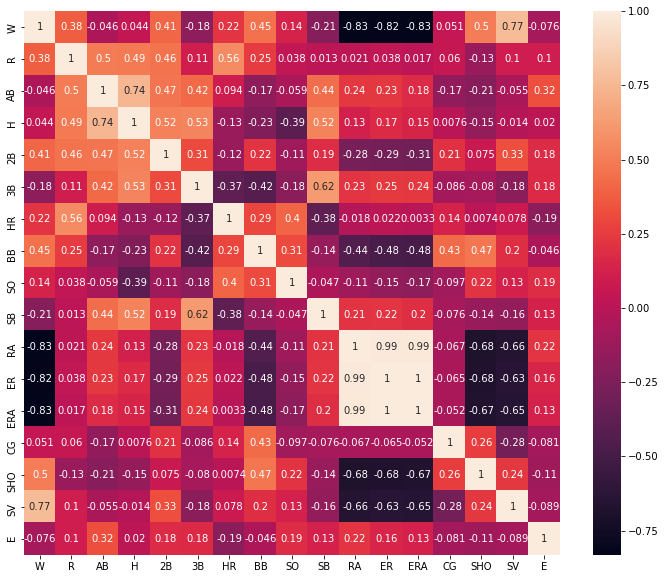

In [3548]:
# Check the correlation between 'fixed acidity' & 'label - Quality'
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SO' and Label:- 'W' is 0.42

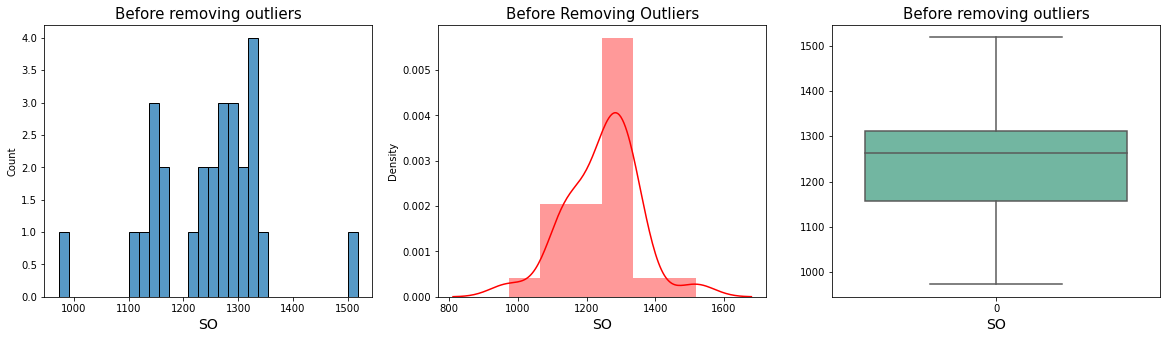

In [3549]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SO'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SO', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SO'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SO', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SO'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SO', fontsize= 14)

plt.show()

In [3550]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['SO'].mean())
print('Median of the column:----->',df['SO'].median())
print('Mode of the column:----->',st.mode(df['SO']))
print('std of the column:----->',df['SO'].std())

Mean of the column:-----> 1246.0740740740741
Median of the column:-----> 1264.0
Mode of the column:-----> 1150
std of the column:-----> 104.11714036304934


In [3551]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 17)


# Columns10: SB - Stolen Bases

In [3552]:
df['SB'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([104,  70,  86,  68,  63,  44,  87,  71, 101,  52,  69,  78,  98,
        95,  84, 134,  51,  57, 112,  88,  59,  93, 132,  82,  97],
      dtype=int64)

In [3553]:
df['SB'].describe() #check the mean, std, iqr and quartile range

count     27.000000
mean      81.962963
std       22.875048
min       44.000000
25%       68.500000
50%       82.000000
75%       96.000000
max      134.000000
Name: SB, dtype: float64

In [3554]:
df['SB'].value_counts() #check the number of counts assign to every particular data in this column

69     3
97     1
51     1
84     1
93     1
59     1
95     1
88     1
87     1
86     1
57     1
52     1
134    1
98     1
132    1
112    1
78     1
44     1
82     1
104    1
71     1
70     1
101    1
68     1
63     1
Name: SB, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

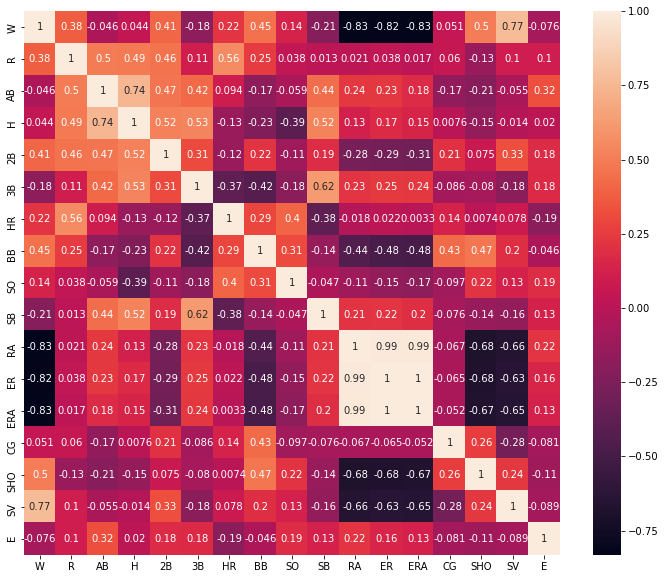

In [3555]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SB' and Label:- 'W' is -0.21

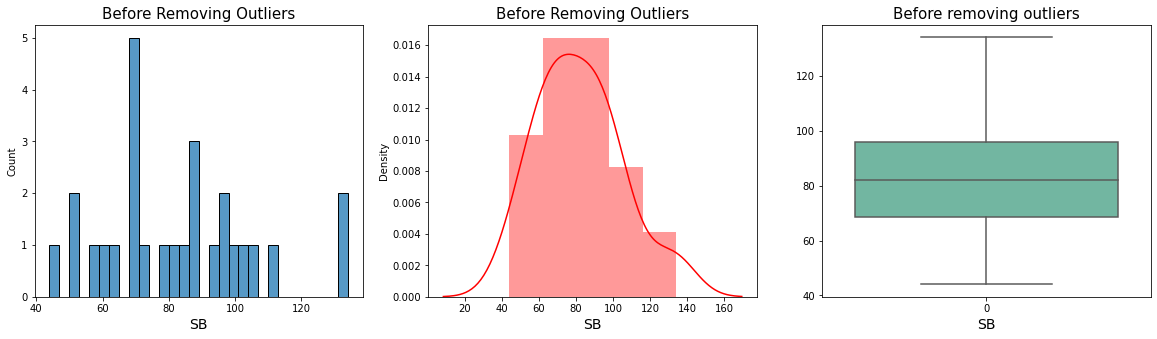

In [3556]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SB'], bins = 30) #visualize the outliers by using histplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SB'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.show()

In [3557]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['SB'].mean())
print('Median of the column:----->',df['SB'].median())
print('Mode of the column:----->',st.mode(df['SB']))
print('std of the column:----->',df['SB'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 81.96296296296296
Median of the column:-----> 82.0
Mode of the column:-----> 69
std of the column:-----> 22.87504767793515


In [3558]:
#Replace the value of mode to column mean to get more normal curve
df['SB'] = df['SB'].replace(69, df['SB'].mean())

In [3559]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['SB'].mean())
print('Median of the column:----->',df['SB'].median())
print('Mode of the column:----->',st.mode(df['SB']))
print('std of the column:----->',df['SB'].std())
#Now, We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 83.40329218106996
Median of the column:-----> 82.0
Mode of the column:-----> 81.96296296296296
std of the column:-----> 22.39920580125308


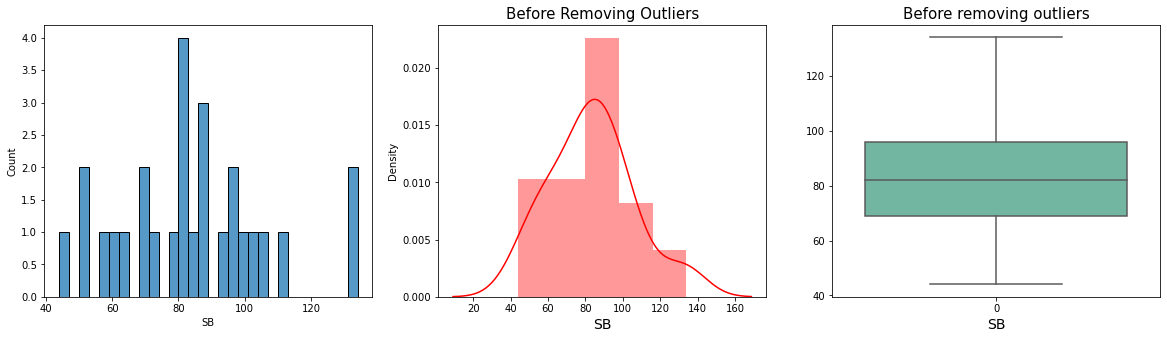

In [3560]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SB'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SB'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SB'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('SB', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

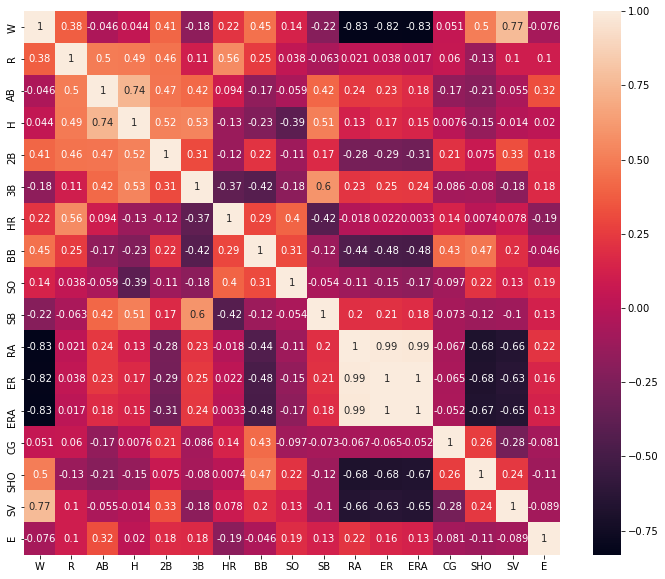

In [3561]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SB' and Label:- 'W' is -0.22

In [3562]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 17)


# Columns11: RA - Runs Allowed

In [3563]:
df['RA'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([641, 700, 640, 701, 698, 693, 642, 753, 733, 675, 726, 729, 525,
       596, 608, 737, 754, 613, 635, 678, 760, 809, 595, 627, 713, 731,
       844], dtype=int64)

In [3564]:
df['RA'].describe() #check the mean, std, iqr and quartile range

count     27.000000
mean     687.259259
std       71.340242
min      525.000000
25%      637.500000
50%      698.000000
75%      732.000000
max      844.000000
Name: RA, dtype: float64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

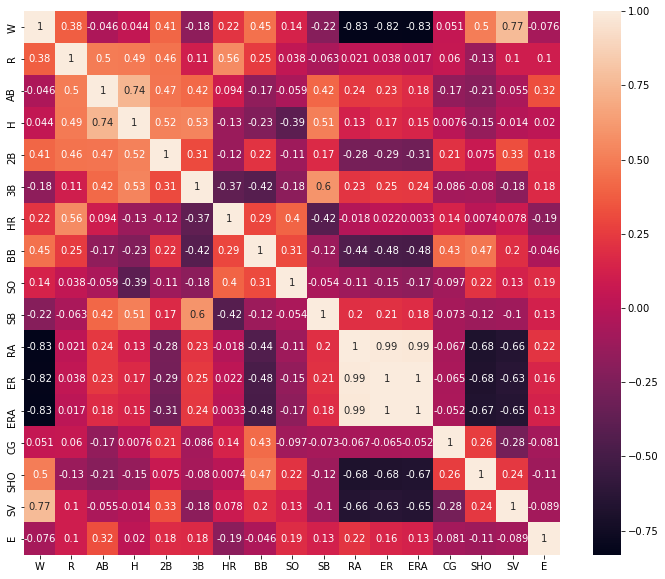

In [3565]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'RA' and Label:- 'W' is -0.83

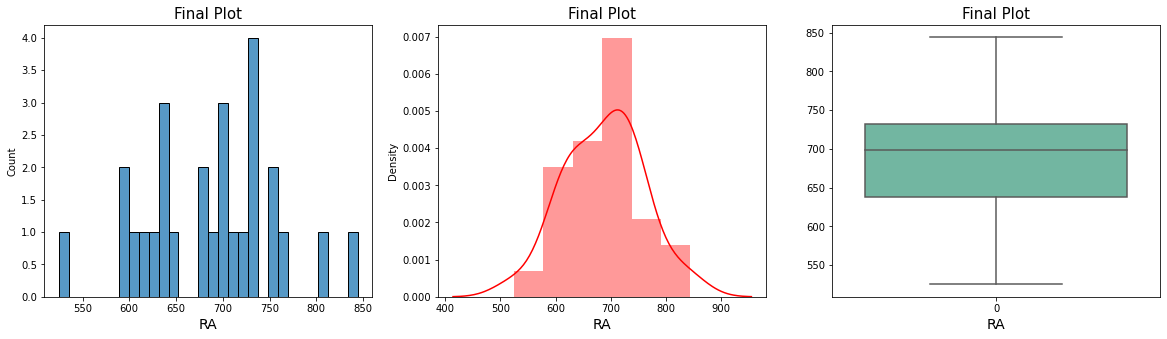

In [3566]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['RA'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('RA', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['RA'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('RA', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['RA'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('RA', fontsize= 14)

plt.show()

In [3567]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['RA'].mean())
print('Median of the column:----->',df['RA'].median())
print('Mode of the column:----->',st.mode(df['RA']))
print('std of the column:----->',df['RA'].std())
#We can see that our mean,median,mode values are looking good. 

Mean of the column:-----> 687.2592592592592
Median of the column:-----> 698.0
Mode of the column:-----> 641
std of the column:-----> 71.34024249629518


In [3568]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 17)


# Columns12: ER: Earned runs

In [3569]:
df['ER'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([601, 653, 584, 643, 652, 646, 604, 694, 680, 630, 677, 664, 478,
       532, 546, 682, 700, 557, 577, 638, 698, 749, 553, 597, 659, 655,
       799], dtype=int64)

In [3570]:
df['ER'].describe() #check the mean, std, iqr and quartile range

count     27.000000
mean     635.111111
std       69.538774
min      478.000000
25%      590.500000
50%      646.000000
75%      678.500000
max      799.000000
Name: ER, dtype: float64

In [3571]:
df['ER'].value_counts() #check the number of counts assign to every particular data in this column

577    1
478    1
638    1
700    1
698    1
630    1
749    1
682    1
553    1
680    1
677    1
546    1
799    1
604    1
643    1
601    1
664    1
557    1
597    1
532    1
659    1
655    1
653    1
652    1
584    1
646    1
694    1
Name: ER, dtype: int64

correlation between the Features and with label:-----> (17, 17)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

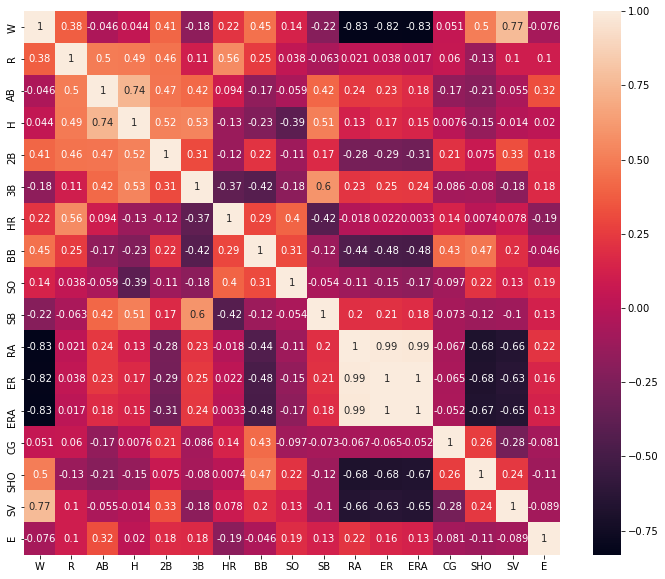

In [3572]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'ER' and Label:- 'W' is 0.42

In [3573]:
#We clearly see that Column RA and ER both are highly correlated to each other, 
#so, we drop this column
df.drop(columns = ['ER'], inplace = True) 

In [3574]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 16)


# Column12: ERA - Earned Run Average

In [3575]:
df['ERA'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([3.73, 4.07, 3.67, 3.98, 4.03, 4.05, 3.74, 4.31, 4.24, 3.94, 4.16,
       4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62, 4.02, 4.41, 4.69,
       3.44, 3.72, 4.04, 4.09, 5.04])

In [3576]:
df['ERA'].describe() #check the mean, std, iqr and Quartile range

count    27.000000
mean      3.951111
std       0.453103
min       2.940000
25%       3.695000
50%       4.030000
75%       4.200000
max       5.040000
Name: ERA, dtype: float64

In [3577]:
df['ERA'].value_counts() #check the number of counts assign to every particular data in this column

3.62    1
3.21    1
3.94    1
4.02    1
5.04    1
3.67    1
4.24    1
4.69    1
4.41    1
4.16    1
3.43    1
4.14    1
4.03    1
4.28    1
4.31    1
3.36    1
4.04    1
3.72    1
3.44    1
4.07    1
3.74    1
2.94    1
3.73    1
4.09    1
4.33    1
4.05    1
3.98    1
Name: ERA, dtype: int64

correlation between the Features and with label:-----> (16, 16)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

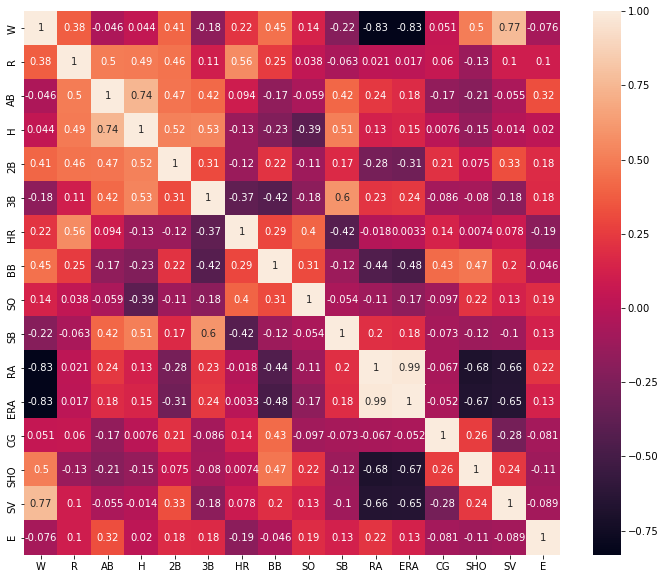

In [3578]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'ERA' and Label:- 'W' is -0.83

In [3579]:
#We clearly see that Column RA and ERA both are highly correlated to each other, 
#so, we drop this column
df.drop(columns = ['ERA'], inplace = True)

In [3580]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (27, 15)


# Columns13: CG - Complete Game

In [3581]:
df['CG'].unique() #check the unique value in our column
#We clearly see there is no null value in our column

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [3582]:
df['CG'].value_counts() #check the number of counts assign to every particular data in this column

1     7
2     4
0     3
3     3
6     3
4     2
5     2
7     2
11    1
Name: CG, dtype: int64

In [3583]:
df['CG'].describe() #check the mean, std, iqr and quartile range

count    27.000000
mean      3.148148
std       2.713268
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      11.000000
Name: CG, dtype: float64

In [3584]:
df['CG'].all() #check there is any zero value in our column or not

False

In [3585]:
df['CG'] = df['CG'].replace(0.0, df['CG'].mean()) #replace zero value to column mean

In [3586]:
df['CG'].describe() #now, check the parameters

count    27.000000
mean      3.497942
std       2.468036
min       1.000000
25%       1.500000
50%       3.000000
75%       5.000000
max      11.000000
Name: CG, dtype: float64

correlation between the Features and with label:-----> (15, 15)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

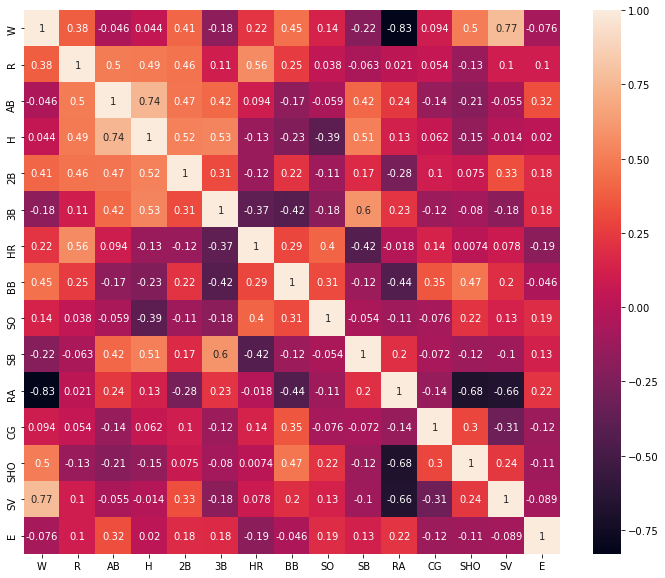

In [3587]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'CG' and Label:- 'W' is 0.094

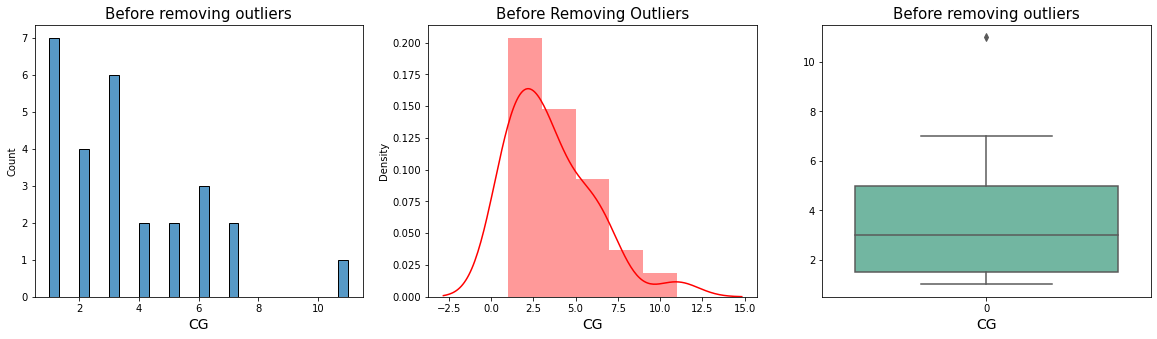

In [3588]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

In [3589]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['CG'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['CG'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['CG'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['CG'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 3.5

 **************************************************
Higher range:-
 (array([2], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [3590]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (27, 15)
New Shape:------>  (26, 15)


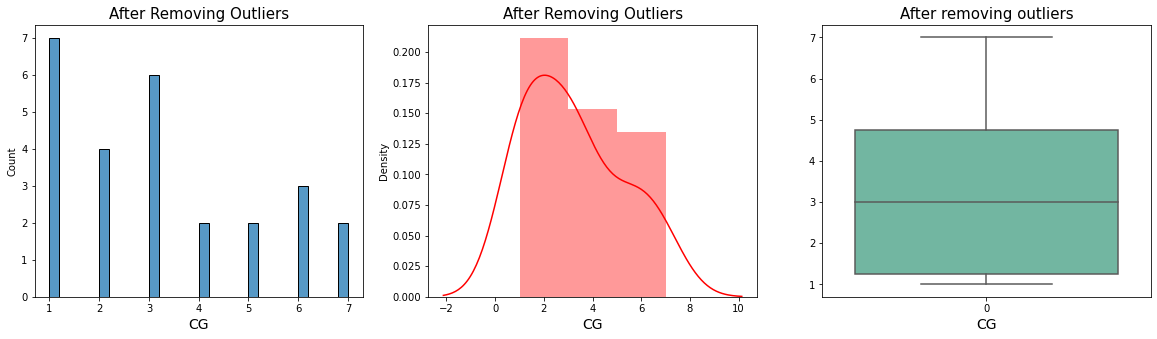

In [3591]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

In [3592]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CG'].mean())
print('Median of the column:----->',df['CG'].median())
print('Mode of the column:----->',st.mode(df['CG']))
print('std of the column:----->',df['CG'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 3.2094017094017095
Median of the column:-----> 3.0
Mode of the column:-----> 1.0
std of the column:-----> 1.9992575386676912


In [3593]:
#Replace the value of mode to column mean to get more normal curve
df['CG'] = df['CG'].replace(1.0, df['CG'].mean())

In [3594]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CG'].mean())
print('Median of the column:----->',df['CG'].median())
print('Mode of the column:----->',st.mode(df['CG']))
print('std of the column:----->',df['CG'].std())
#We can see that our mean,median,mode values are not good now. 

Mean of the column:-----> 3.8042406311637076
Median of the column:-----> 3.2094017094017095
Mode of the column:-----> 3.2094017094017095
std of the column:-----> 1.5040732607093588


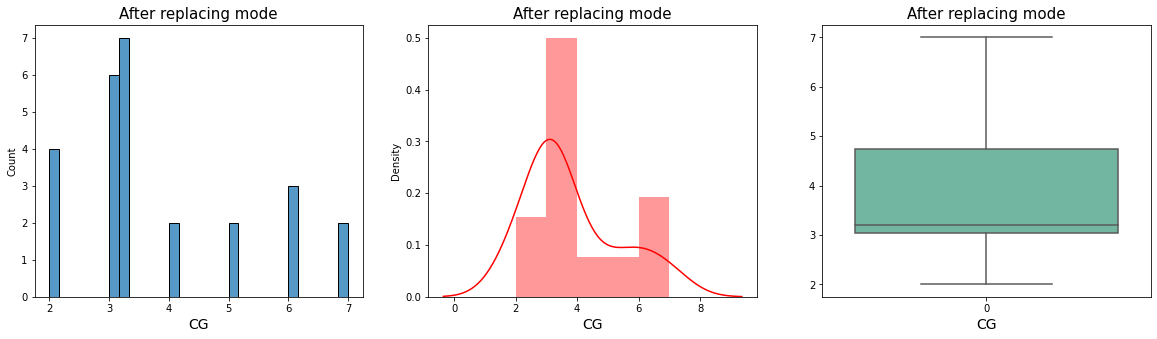

In [3595]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

In [3596]:
#Replace the value of mode to column mean to get more normal curve
df['CG'] = df['CG'].replace(3.2094017094017095, df['CG'].mean())

In [3597]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CG'].mean())
print('Median of the column:----->',df['CG'].median())
print('Mode of the column:----->',st.mode(df['CG']))
print('std of the column:----->',df['CG'].std())
#Improving our values to get best curve

Mean of the column:-----> 3.964389571638092
Median of the column:-----> 3.8042406311637076
Mode of the column:-----> 3.8042406311637076
std of the column:-----> 1.461673509072522


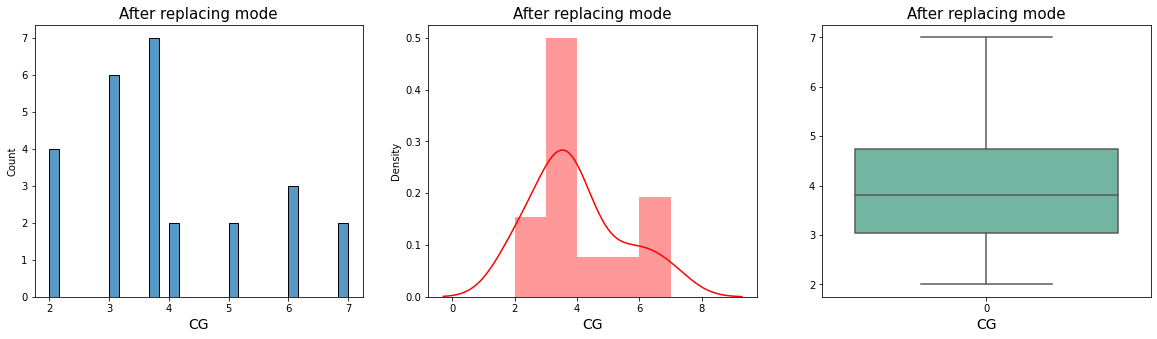

In [3598]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

In [3599]:
#Replace the value of mode to column mean to get more normal curve
df['CG'] = df['CG'].replace(3.8042406311637076, df['CG'].mean())

In [3600]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CG'].mean())
print('Median of the column:----->',df['CG'].median())
print('Mode of the column:----->',st.mode(df['CG']))
print('std of the column:----->',df['CG'].std())
#Improving our values to get best curve

Mean of the column:-----> 4.0075065940735035
Median of the column:-----> 3.964389571638092
Mode of the column:-----> 3.964389571638092
std of the column:-----> 1.458552246276395


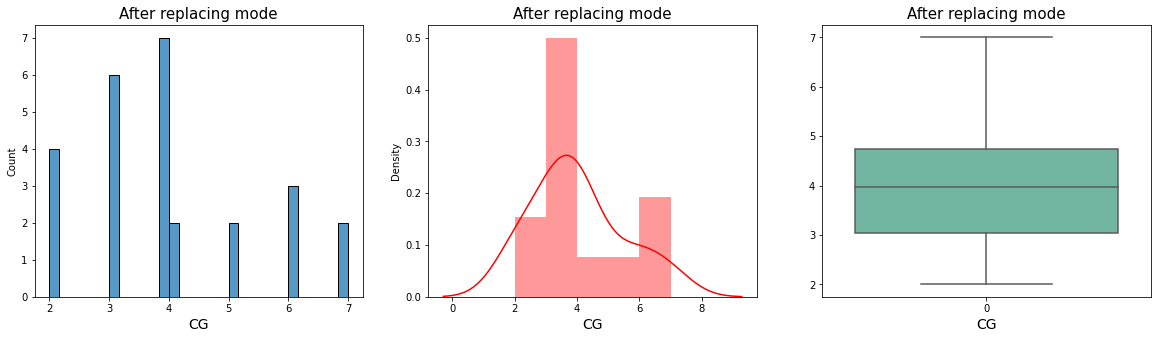

In [3601]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After replacing mode', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

In [3602]:
#Replace the value of mode to column mean to get more normal curve
df['CG'] = df['CG'].replace(3.964389571638092, df['CG'].mean())

In [3603]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CG'].mean())
print('Median of the column:----->',df['CG'].median())
print('Mode of the column:----->',st.mode(df['CG']))
print('std of the column:----->',df['CG'].std())
#Now, we get a best parameters

Mean of the column:-----> 4.0191150231907296
Median of the column:-----> 4.0075065940735035
Mode of the column:-----> 4.0075065940735035
std of the column:-----> 1.458325741229184


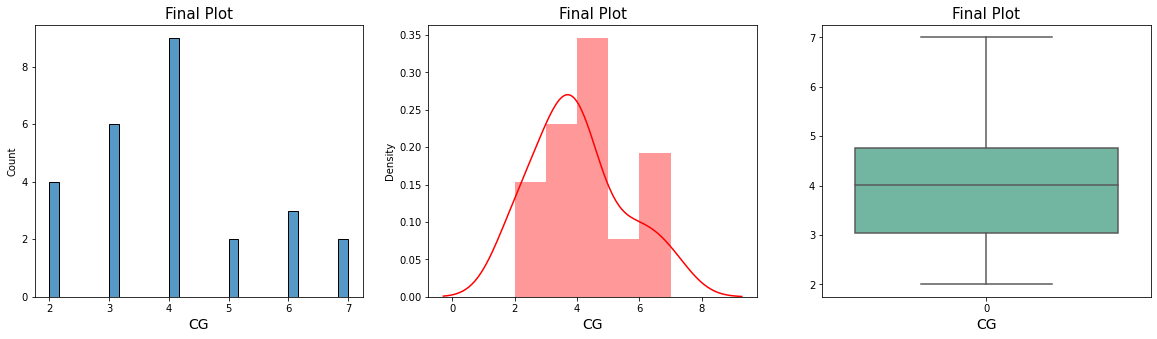

In [3604]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CG'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CG'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CG'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('CG', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (15, 15)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

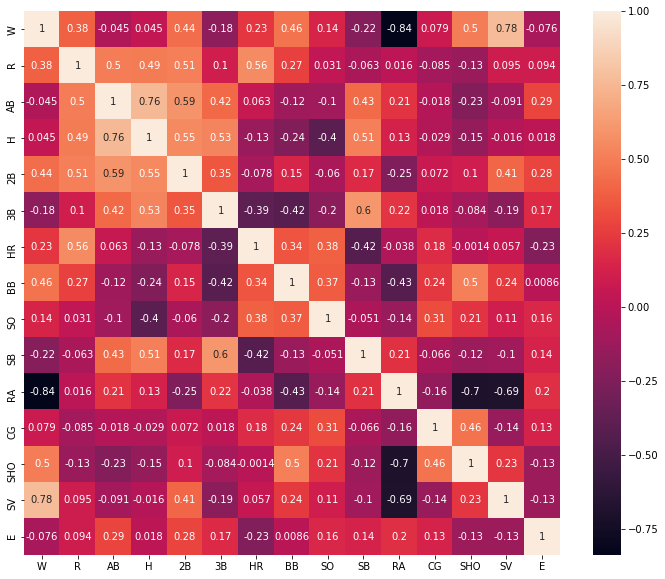

In [3605]:
# Check the correlation between 'fixed acidity' & 'label - Quality'
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'H - Hits' and Label:- 'quality' is 0.42

In [3606]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (26, 15)


# Columns14: SHO - Shutouts

In [3607]:
df['SHO'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([ 8, 12,  9,  4, 10, 15, 13, 21,  7, 14, 18,  6], dtype=int64)

In [3608]:
df['SHO'].describe() 

count    26.000000
mean     11.307692
std       4.406987
min       4.000000
25%       8.250000
50%      12.000000
75%      13.000000
max      21.000000
Name: SHO, dtype: float64

In [3609]:
df['SHO'].value_counts() #check the number of counts assign to every particular data in this column

12    6
10    3
4     2
7     2
8     2
9     2
13    2
15    2
21    2
6     1
14    1
18    1
Name: SHO, dtype: int64

correlation between the Features and with label:-----> (15, 15)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

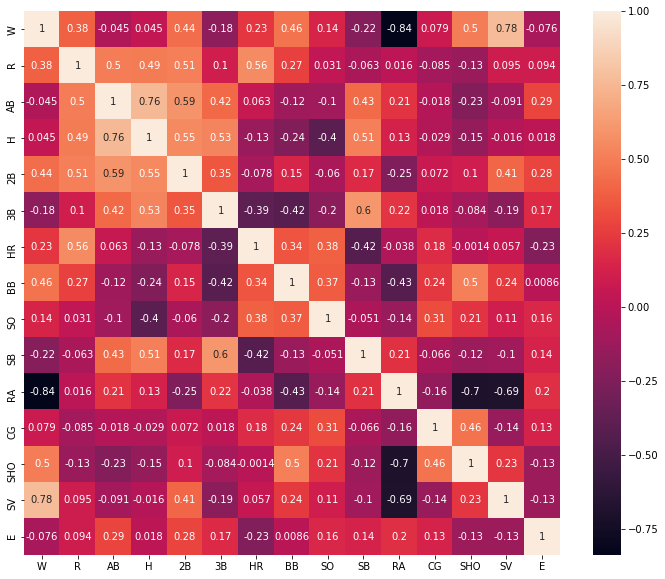

In [3610]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SHO' and Label:- 'W' is 0.42

In [3611]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['SHO'].mean())
print('Median of the column:----->',df['SHO'].median())
print('Mode of the column:----->',st.mode(df['SHO']))
print('std of the column:----->',df['SHO'].std())
#We can see that our mean,median,mode values are not good now.

Mean of the column:-----> 11.307692307692308
Median of the column:-----> 12.0
Mode of the column:-----> 12
std of the column:-----> 4.406987458745312


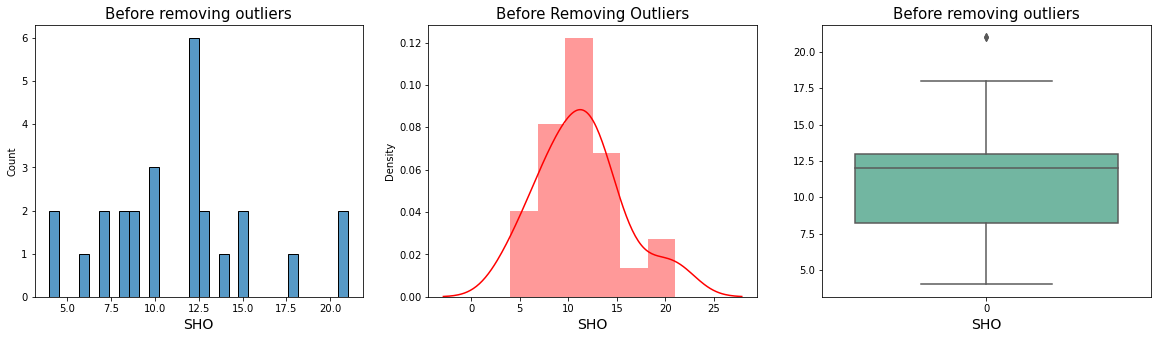

In [3612]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SHO'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SHO'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SHO'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.show()

In [3613]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['SHO'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['SHO'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['SHO'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['SHO'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 4.5

 **************************************************
Higher range:-
 (array([13, 21], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [3614]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (26, 15)
New Shape:------>  (24, 15)


In [3615]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['SHO'].mean())
print('Median of the column:----->',df['SHO'].median())
print('Mode of the column:----->',st.mode(df['SHO']))
print('std of the column:----->',df['SHO'].std())

Mean of the column:-----> 10.5
Median of the column:-----> 11.0
Mode of the column:-----> 12
std of the column:-----> 3.5015524507305886


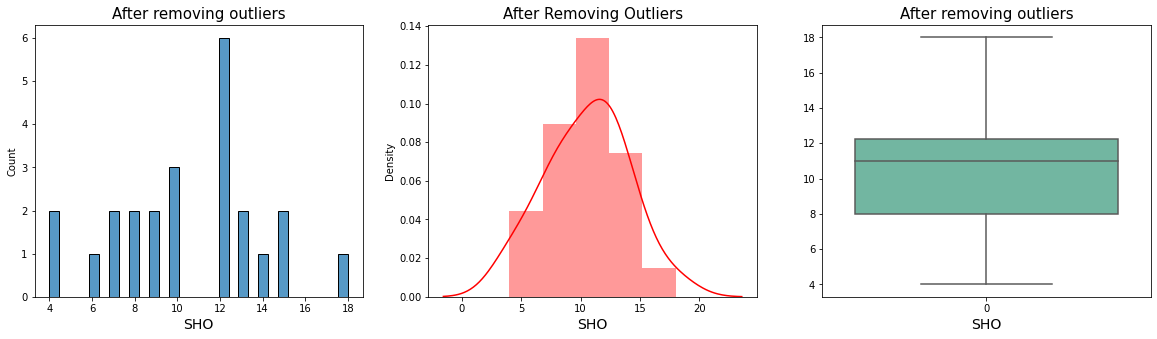

In [3616]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SHO'], bins = 30) #visualize the outliers by using histplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SHO'], color='r') #visualize the normalization curve by using distplot
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SHO'], palette="Set2") #visualize the outliers by using boxplot
plt.title('After removing outliers', fontsize=15)
plt.xlabel('SHO', fontsize= 14)

plt.show()

correlation between the Features and with label:-----> (15, 15)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

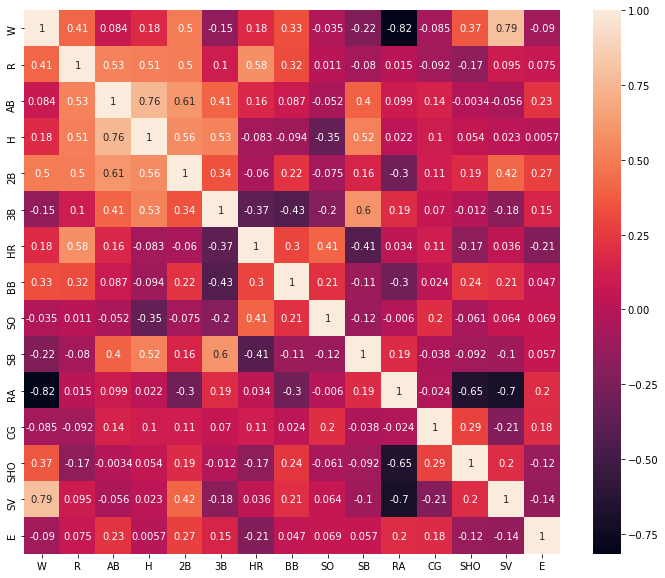

In [3617]:
# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SHO' and Label:- 'W' is 0.42

In [3618]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (24, 15)


# Columns16: SV - Saves

In [3619]:
df['SV'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([56, 45, 37, 48, 43, 60, 40, 46, 28, 62, 54, 35, 50, 41, 44, 36],
      dtype=int64)

In [3620]:
df['SV'].describe()

count    24.000000
mean     43.791667
std       8.219696
min      28.000000
25%      39.250000
50%      43.500000
75%      46.500000
max      62.000000
Name: SV, dtype: float64

In [3621]:
df['SV'].value_counts() #check the number of counts assign to every particular data in this column

35    3
41    3
45    3
40    2
44    2
36    1
37    1
43    1
46    1
48    1
50    1
54    1
28    1
56    1
60    1
62    1
Name: SV, dtype: int64

correlation between the Features and with label:-----> (15, 15)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

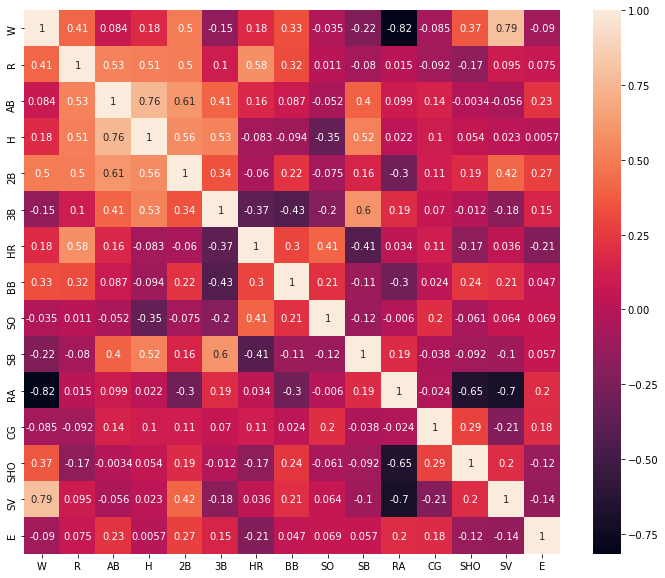

In [3622]:
79# Check the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'SV' and Label:- 'W' is 0.79

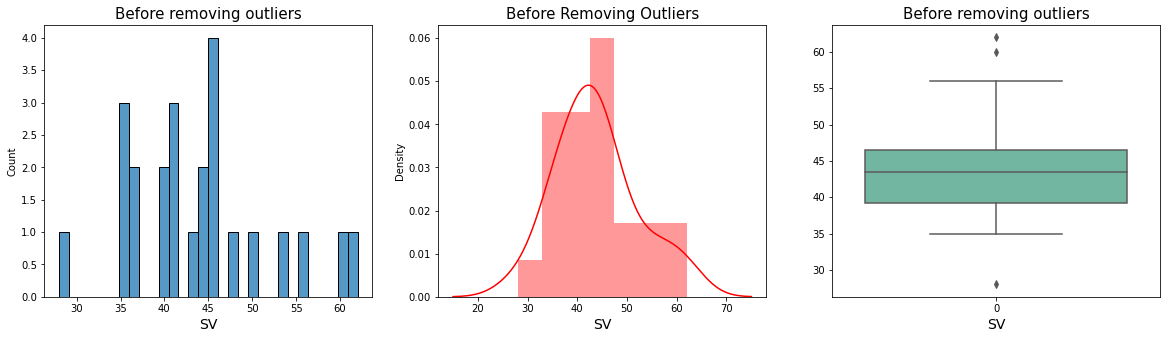

In [3623]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['SV'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('SV', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['SV'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('SV', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['SV'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('SV', fontsize= 14)

plt.show()

In [3624]:
#Too many outliers
df.drop(columns='SV', inplace=True)

In [3625]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (24, 14)


# Columns17: E - Errors

In [3626]:
df['E'].unique() #check the unique value in our column
#We clearly see there is no null value and no zeros in our column

array([ 88,  86, 101,  93,  77,  95,  97, 119,  94, 126,  96, 122, 116,
        90, 117,  78,  92], dtype=int64)

In [3627]:
df['E'].describe()

count     24.000000
mean      96.083333
std       13.977985
min       77.000000
25%       88.000000
50%       93.000000
75%       98.000000
max      126.000000
Name: E, dtype: float64

In [3628]:
df['E'].value_counts() #check the number of counts assign to every particular data in this column

90     3
77     2
93     2
88     2
86     2
95     2
78     1
116    1
97     1
126    1
119    1
101    1
122    1
92     1
117    1
94     1
96     1
Name: E, dtype: int64

correlation between the Features and with label:-----> (14, 14)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

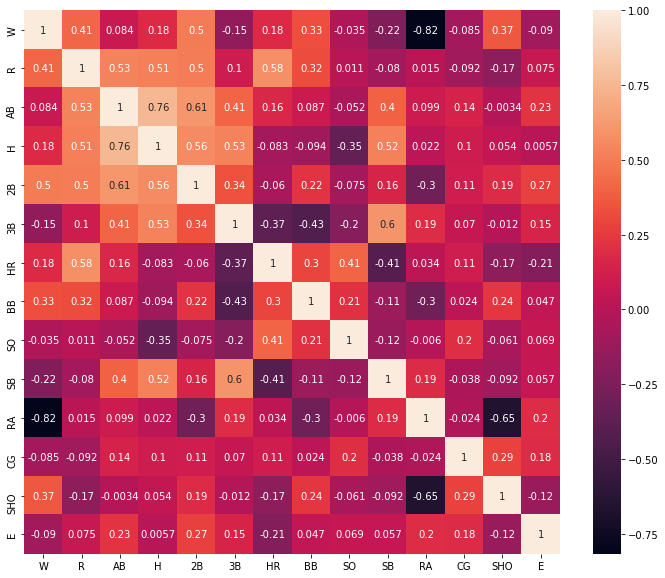

In [3629]:
# Check the correlation between 'fixed acidity' & 'label - Quality'
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'E' and Label:- 'W' is -0.09

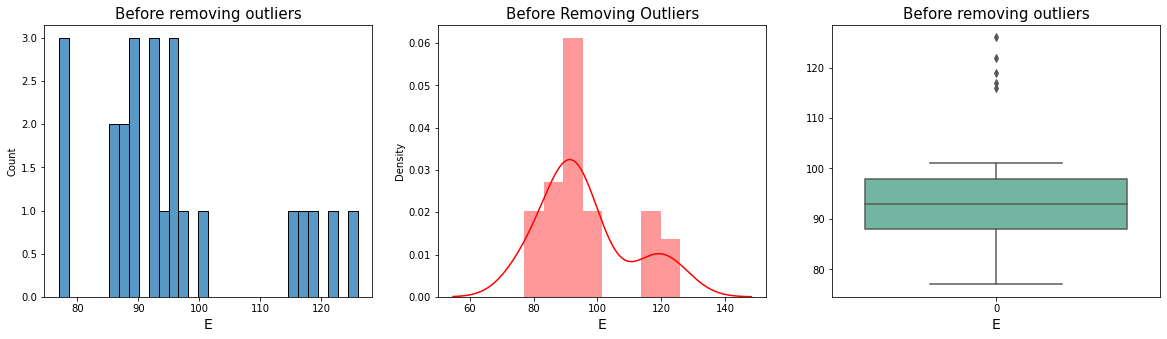

In [3630]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['E'], bins = 30) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('E', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['E'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('E', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['E'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('E', fontsize= 14)

plt.show()

In [3631]:
#Too many outliers
df.drop(columns='E', inplace=True)

In [3632]:
df.shape #check the shape of the dataset

(24, 13)

In [3633]:
df.head()

W           R           AB     H          2B         3B          HR  \
0  95  724.000000  5575.000000  1497  300.000000  42.000000  139.000000   
1  83  681.241379  5467.000000  1349  277.000000  44.000000  156.000000   
3  76  622.000000  5533.000000  1381  260.000000  31.178571  161.642857   
6  87  764.000000  5567.000000  1397  273.035714  19.000000  212.000000   
7  81  713.000000  5516.517241  1370  246.000000  20.000000  217.000000   

      BB    SO     SB   RA        CG  SHO  
0  383.0   973  104.0  641  2.000000    8  
1  439.0  1264   70.0  700  2.000000   12  
3  404.0  1231   68.0  701  7.000000    9  
6  554.0  1227   63.0  698  3.000000    4  
7  418.0  1331   44.0  693  3.148148   10

# Label: W - Wins

In [3634]:
df['W'].unique() #check the unique values

array([ 95,  83,  76,  87,  81,  80,  78,  88,  85,  68, 100,  98,  64,
        90,  71,  67,  63,  84,  79,  74], dtype=int64)

In [3635]:
df['W'].describe() #check the mean. std. iqr and quatile range

count     24.000000
mean      79.416667
std       10.454525
min       63.000000
25%       70.250000
50%       79.500000
75%       85.500000
max      100.000000
Name: W, dtype: float64

In [3636]:
df['W'].value_counts() #check the number of counts

68     3
83     2
76     2
64     1
100    1
74     1
90     1
88     1
87     1
85     1
84     1
81     1
98     1
80     1
79     1
78     1
63     1
71     1
67     1
95     1
Name: W, dtype: int64

correlation between the Features and with label:-----> (13, 13)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

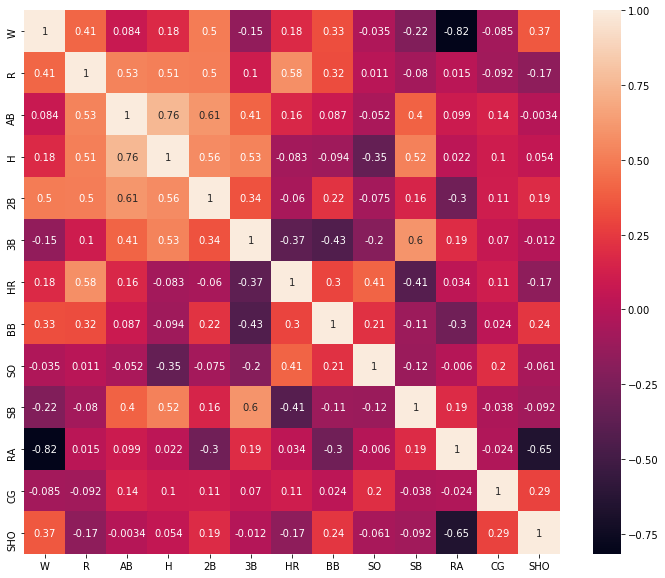

In [3637]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'W' and Label:- 'W' is 0.42

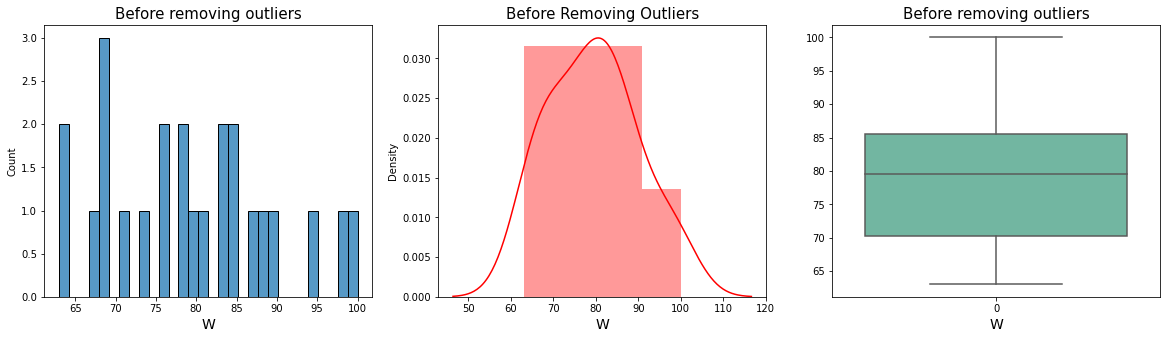

In [3638]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['W'], bins = 30) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('W', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['W'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('W', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['W'], palette="Set2") #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('W', fontsize= 14)

plt.show()

In [3639]:
df.shape #check the final shape of our dataset

(24, 13)

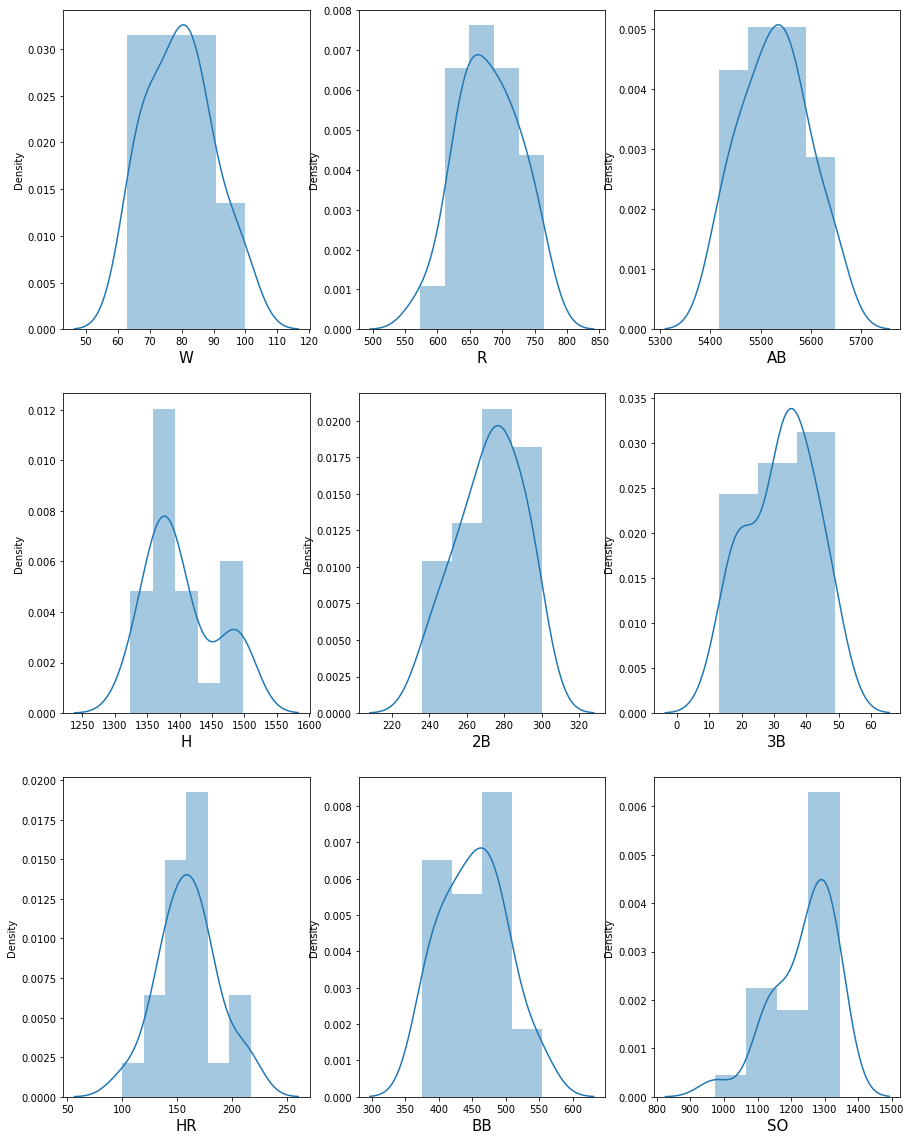

In [3640]:
#visaulize the columns by using distplot
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

In [3641]:
#split x and y
x = df.drop(['W'], axis=1)
y=df.W

In [3642]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.95763674,  0.71998029,  1.77766256,  1.6252125 ,  0.95135663,
        -0.79642305, -1.46427326, -2.91526304,  0.89088322, -0.80593025,
        -1.35905247, -0.72932496],
       [ 0.05812377, -0.92139659, -1.01378634,  0.2840868 ,  1.14695451,
        -0.16212739, -0.29391252,  0.28652923, -0.61075699,  0.05275841,
        -1.35905247,  0.43759497],
       [-1.18813693,  0.08166706, -0.41022982, -0.70718002, -0.10696759,
         0.04841613, -1.02538798, -0.07656061, -0.69908876,  0.06731246,
         2.30605598, -0.43759497],
       [ 1.79911661,  0.59839682, -0.10845156,  0.05293004, -1.29801894,
         1.92731713,  2.10950687, -0.1205715 , -0.91991821,  0.02365032,
        -0.62603078, -1.89624489],
       [ 0.72622977, -0.16883682, -0.61770238, -1.52351741, -1.20022   ,
         2.11387467, -0.7327978 ,  1.02371165, -1.75907009, -0.0491199 ,
        -0.51743497, -0.14586499],
       [-0.725323  , -0.16883682, -0.37250754,  0.34239661, -0.02663275,
         0.24829921, -

In [3643]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #R-Runs has high multicollinearity but it is very important column to decide wins

vif features
0   8.837705        R
1   4.047079       AB
2   7.900500        H
3   3.497687       2B
4   3.745844       3B
5   5.094798       HR
6   3.113267       BB
7   1.746805       SO
8   4.111120       SB
9   2.547605       RA
10  1.698374       CG
11  2.726564      SHO

In [3644]:
x = df.drop(['H'], axis=1)
x = df.drop(['HR'], axis=1)

In [3645]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 1.52264178,  0.95763674,  0.71998029,  1.77766256,  1.6252125 ,
         0.95135663, -1.46427326, -2.91526304,  0.89088322, -0.80593025,
        -1.35905247, -0.72932496],
       [ 0.35012618,  0.05812377, -0.92139659, -1.01378634,  0.2840868 ,
         1.14695451, -0.29391252,  0.28652923, -0.61075699,  0.05275841,
        -1.35905247,  0.43759497],
       [-0.33384124, -1.18813693,  0.08166706, -0.41022982, -0.70718002,
        -0.10696759, -1.02538798, -0.07656061, -0.69908876,  0.06731246,
         2.30605598, -0.43759497],
       [ 0.74096471,  1.79911661,  0.59839682, -0.10845156,  0.05293004,
        -1.29801894,  2.10950687, -0.1205715 , -0.91991821,  0.02365032,
        -0.62603078, -1.89624489],
       [ 0.15470692,  0.72622977, -0.16883682, -0.61770238, -1.52351741,
        -1.20022   , -0.7327978 ,  1.02371165, -1.75907009, -0.0491199 ,
        -0.51743497, -0.14586499],
       [ 0.05699729, -0.725323  , -0.16883682, -0.37250754,  0.34239661,
        -0.02663275, -

In [3647]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [3648]:
y_train.head()

18    68
1     83
27    79
8     80
3     76
Name: W, dtype: int64

# LinearRegression

In [3649]:
#Model instantiating and training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [3650]:
#How much my model learn ( model confidence)
lr.score(x_train, y_train)

1.0

In [3651]:
#Let's check how well model fits the test data
lr.score(x_test,y_test)

1.0

In [3652]:
y_pred = lr.predict(x_test)

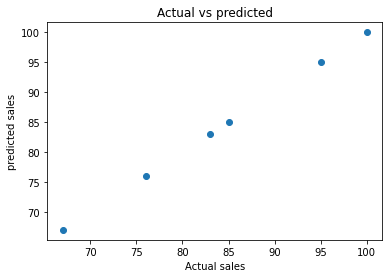

In [3653]:
#plot the actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales')
plt.ylabel('predicted sales')
plt.title('Actual vs predicted')
plt.show()

<AxesSubplot:xlabel='W', ylabel='Count'>

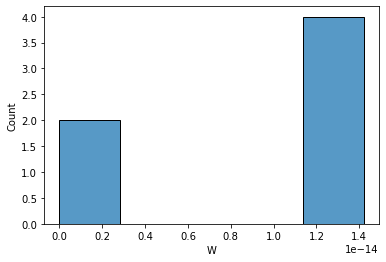

In [3656]:
#show residuals on histogram
residual = (y_pred - y_test)
sns.histplot(data = residual, bins = 5)

# Model Evaluation

In [3657]:
#calculate Mean absolute error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test, y_pred)

9.473903143468002e-15

In [3658]:
#calculate mean squared error
mean_squared_error(y_test,y_pred)

1.3463226115771934e-28

In [3659]:
#calculate root mean square error
np.sqrt(mean_squared_error(y_test,y_pred))

1.160311428702309e-14

# Lasso Regression

In [3660]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [3661]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [3662]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [3663]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

0.0022146475844211514

In [3664]:
#fit the data
lasso_reg = Lasso(alpha)

In [3665]:
lasso_reg.fit(x_train,y_train) #train the data

Lasso(alpha=0.0022146475844211514)

In [3666]:
lasso_reg.score(x_test,y_test) #get the score of test data

0.999999910847565

# Ridge regression

In [3667]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [3668]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [3669]:
#best alpha parameter
ridgecv.alpha_

0.001

In [3670]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [3671]:
ridge_model.score(x_test,y_test) #get the score

0.9999990454330772

# Ada boost Regreesor

In [3672]:
ada = AdaBoostRegressor() #using this to improve accuracy

In [3673]:
ada_model= ada.fit(x_train,y_train) # fit the data

In [3674]:
y_pred = ada_model.predict(x_test) #predict it

In [3676]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test,y_pred) #get the r2score

0.7784487997569127

Hyperparameter tuning by using Linear Regression and Decision Tree to improve accuracy

In [3714]:
lr = LinearRegression()

In [3684]:
params = {'n_estimators': [40,47,49,50], 'learning_rate' :[.30,.40,.45]}

In [3687]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv =5, param_distributions = params ) #using randomsearchCv

In [3688]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [3689]:
rnd_srch.best_estimator_ 

AdaBoostRegressor(learning_rate=0.45, n_estimators=47)

In [3690]:
ada = AdaBoostRegressor( base_estimator = lr, learning_rate = 0.45, n_estimators = 47)
#first by using linear regression

In [3691]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.45,
                  n_estimators=47)

In [3692]:
y_pred = ada.predict(x_test) #predict it

In [3694]:
r2_score(y_test,y_pred) #get the score

0.9961823760284991

Using DecisionTreeRegressor

In [3695]:
dt = DecisionTreeRegressor() #now by using decision tree

In [3696]:
ada = AdaBoostRegressor( base_estimator = dt, learning_rate = 0.45, n_estimators = 47)

In [3697]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45,
                  n_estimators=47)

In [3698]:
y_pred = ada.predict(x_test) #predict it

In [3699]:
r2_score(y_test,y_pred) #get the score

0.7935278030993619

# Xgb Boost

In [3700]:
import xgboost as xgb #import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3701]:
xgbr = xgb.XGBRegressor()  #to improve accuracy
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.9716197223910458

# GradientBoostingRegressor

In [3702]:
gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4) 
#using GBR

In [3703]:
gbr = gradientregressor.fit(x_train,y_train) #fit the data

In [3704]:
r2_score(y_test,y_pred) #predict it 

0.9716197223910458

In [3705]:
from sklearn.model_selection import GridSearchCV #import libraries

In [3706]:
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}

In [3707]:
grid = GridSearchCV(gbr, param_grid = grid_params)

In [3708]:
grid.fit(x_train, y_train) #fit the data

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                 n_estimators=6),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [3709]:
grid.best_params_ # get the best parameters

{'learning_rate': 0.6, 'max_depth': 10, 'min_samples_split': 6}

In [3710]:
a = grid.best_estimator_

In [3711]:
a.fit(x_train,y_train) # fit the data

GradientBoostingRegressor(learning_rate=0.6, max_depth=10, min_samples_split=6,
                          n_estimators=6)

In [3712]:
y_pred = a.predict(x_test) # predict it

In [3713]:
r2_score(y_test, y_pred) # get the improved r2 score

0.9727915737052918

In [ ]:
#Oue best model is Ada Boost regressor with randomizedsearchcv 
#by using Linear regression as a best extimator

# saving the model

In [3716]:
with open('Base ball case study','wb') as f: #finally, saving the model
    pickle.dump(ada,f)